# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


# Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zi



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df=pd.read_csv('avocado1.csv',parse_dates=['Date'])
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-04-02          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-07-01          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

# EDA

In [3]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [4]:
# Datset Types
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

in this dataset 4 types of data is present 
1) integer
2) float
3) object
4) datetime

In [5]:
# Columns Name in dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
# Dimension of Data set
print('Dataset has "{}" rows and "{}" columns.'.format(df.shape[0],df.shape[1]))

Dataset has "18249" rows and "13" columns.


In 13 columns two column is target variable AveragePrice is for regression task and region is for classification task.

In [7]:
# Checking Null Values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values is present in dataset.

In [8]:
# Checking date range of dataset
print('Dataset set is from "{}" to "{}".'.format(df['Date'].min(),df['Date'].max()))

Dataset set is from "2015-01-02 00:00:00" to "2018-11-03 00:00:00".


In [9]:
# Count of unique value in each column
for d in df.columns:
    print('"{}" unique values are present in {}.'.format(df[d].nunique(),d))
    print('\n')

"169" unique values are present in Date.


"259" unique values are present in AveragePrice.


"18237" unique values are present in Total Volume.


"17702" unique values are present in 4046.


"18103" unique values are present in 4225.


"12071" unique values are present in 4770.


"18097" unique values are present in Total Bags.


"17321" unique values are present in Small Bags.


"15082" unique values are present in Large Bags.


"5588" unique values are present in XLarge Bags.


"2" unique values are present in type.


"4" unique values are present in year.


"54" unique values are present in region.




In [10]:
# unique value in each columns
for d in df.columns:
    print(d)
    print(df[d].unique())
    print('\n')

Date
['2015-12-27T00:00:00.000000000' '2015-12-20T00:00:00.000000000'
 '2015-12-13T00:00:00.000000000' '2015-06-12T00:00:00.000000000'
 '2015-11-29T00:00:00.000000000' '2015-11-22T00:00:00.000000000'
 '2015-11-15T00:00:00.000000000' '2015-08-11T00:00:00.000000000'
 '2015-01-11T00:00:00.000000000' '2015-10-25T00:00:00.000000000'
 '2015-10-18T00:00:00.000000000' '2015-11-10T00:00:00.000000000'
 '2015-04-10T00:00:00.000000000' '2015-09-27T00:00:00.000000000'
 '2015-09-20T00:00:00.000000000' '2015-09-13T00:00:00.000000000'
 '2015-06-09T00:00:00.000000000' '2015-08-30T00:00:00.000000000'
 '2015-08-23T00:00:00.000000000' '2015-08-16T00:00:00.000000000'
 '2015-09-08T00:00:00.000000000' '2015-02-08T00:00:00.000000000'
 '2015-07-26T00:00:00.000000000' '2015-07-19T00:00:00.000000000'
 '2015-12-07T00:00:00.000000000' '2015-05-07T00:00:00.000000000'
 '2015-06-28T00:00:00.000000000' '2015-06-21T00:00:00.000000000'
 '2015-06-14T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-05-31T00:00:0

In [11]:
# Value counts in each columns
for d in df.columns:
    print(d)
    print(df[d].value_counts())
    print('\n')

Date
2015-12-27    108
2017-12-24    108
2017-10-12    108
2017-03-12    108
2017-11-26    108
             ... 
2016-06-11    108
2018-07-01    108
2017-06-18    107
2017-06-25    107
2015-06-12    107
Name: Date, Length: 169, dtype: int64


AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67   

In 4046, 4225, 4770, total bags, small bags, large bags, xlarge bags column 0 is present as value.
1) Xlarge bags has "12048" rows having 0 as value, which is almost 67 % rows. so going to drop this column.
2) Total Bags has least "15" of rows with value 0. 

In [12]:
# Checking rows having value as 0 in Total Bags
df[df['Total Bags']==0]

Date  AveragePrice  Total Volume      4046      4225    4770  \
9212  2015-03-05          2.03       3976.19   1325.62   2650.57    0.00   
11024 2015-06-28          1.53      41116.32   7314.21  33780.38   21.73   
11320 2015-10-18          2.79      12642.11    961.55  11680.56    0.00   
11321 2015-11-10          2.66      14031.73   1046.84  12984.89    0.00   
11333 2015-07-19          2.36      19558.81   3893.65  15665.16    0.00   
11347 2015-12-04          1.54      28220.45  18887.66   9332.79    0.00   
11348 2015-05-04          1.55      26530.70  17104.69   9426.01    0.00   
11387 2015-05-07          1.98      29929.57   8841.34  20807.76  280.47   
11388 2015-06-28          1.71      46229.47   8112.46  37972.31  144.70   
11594 2015-12-07          2.07       2786.45    680.60   2105.85    0.00   
11595 2015-05-07          1.85       3162.45    799.67   2362.78    0.00   
11596 2015-06-28          1.61       4088.37    537.84   3550.53    0.00   
11597 2015-06-21          1.59       4436.79    872.72   3564.07    0.00   
11614 2015-02-22          1.41       4655.86   2067.41   2588.45    0.00   
11662 2015-03-22          1.83       3795.21   1305.95   2489.26    0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
9212          0.0         0.0         0.0          0.0  organic  2015   
11024         0.0         0.0         0.0          0.0  organic  2015   
11320         0.0         0.0         0.0          0.0  organic  2015   
11321         0.0         0.0         0.0          0.0  organic  2015   
11333         0.0         0.0         0.0          0.0  organic  2015   
11347         0.0         0.0         0.0          0.0  organic  2015   
11348         0.0         0.0         0.0          0.0  organic  2015   
11387         0.0         0.0         0.0          0.0  organic  2015   
11388         0.0         0.0         0.0          0.0  organic  2015   
11594         0.0         0.0         0.0          0.0  organic  2015   
11595         0.0         0.0         0.0          0.0  organic  2015   
11596         0.0         0.0         0.0          0.0  organic  2015   
11597         0.0         0.0         0.0          0.0  organic  2015   
11614         0.0         0.0         0.0          0.0  organic  2015   
11662         0.0         0.0         0.0          0.0  organic  2015   

             region  
9212        Atlanta  
11024      Portland  
11320  SanFrancisco  
11321  SanFrancisco  
11333  SanFrancisco  
11347  SanFrancisco  
11348  SanFrancisco  
11387       Seattle  
11388       Seattle  
11594       Spokane  
11595       Spokane  
11596       Spokane  
11597       Spokane  
11614       Spokane  
11662       StLouis

in these 15 rows where total bags has 0 as value, all other bag sizes also have value as 0. so going to drop these rows.

Checking value in columns 0 belong to particular region or not.

In [20]:
# 0 in 4046
df[df['4046']==0]

Date  AveragePrice  Total Volume  4046     4225  4770  Total Bags  \
9130  2015-11-29          1.94        831.69   0.0    94.73   0.0      736.96   
9323  2015-03-15          1.63       1777.09   0.0  1209.68   0.0      567.41   
9329  2015-01-02          1.43       1780.76   0.0   999.31   0.0      781.45   
9332  2015-11-01          1.44       2378.68   0.0  1923.40   0.0      455.28   
9386  2015-12-27          1.47       5043.15   0.0   166.37   0.0     4876.78   
...          ...           ...           ...   ...      ...   ...         ...   
17887 2018-01-14          1.54       3737.85   0.0  1199.91   0.0     2537.94   
17966 2018-02-18          1.58      29699.89   0.0   195.20   0.0    29504.69   
17967 2018-11-02          1.39      22495.69   0.0   176.23   0.0    22319.46   
17969 2018-01-28          1.29      50288.63   0.0   383.92   0.0    49904.71   
17972 2018-07-01          1.75      26188.31   0.0   551.10   0.0    25637.21   

       Small Bags  Large Bags  XLarge Bags     type  year              region  
9130       736.96        0.00          0.0  organic  2015              Albany  
9323       366.67      200.74          0.0  organic  2015               Boise  
9329       283.33      498.12          0.0  organic  2015               Boise  
9332       170.00      285.28          0.0  organic  2015               Boise  
9386      2751.87     2124.91          0.0  organic  2015    BuffaloRochester  
...           ...         ...          ...      ...   ...                 ...  
17887     1769.94      768.00          0.0  organic  2018          Louisville  
17966    29504.69        0.00          0.0  organic  2018  NorthernNewEngland  
17967    22319.46        0.00          0.0  organic  2018  NorthernNewEngland  
17969    49904.71        0.00          0.0  organic  2018  NorthernNewEngland  
17972    25633.88        3.33          0.0  organic  2018  NorthernNewEngland  

[242 rows x 13 columns]

In [21]:
# 0 in 4225
df[df['4225']==0]

Date  AveragePrice  Total Volume    4046  4225  4770  Total Bags  \
10420 2015-08-02          1.72       2118.66  945.33   0.0   0.0     1173.33   
10531 2015-12-20          1.66       1822.24  470.42   0.0   0.0     1351.82   
10532 2015-12-13          1.60       1529.16  424.70   0.0   0.0     1104.46   
10533 2015-06-12          1.35       2211.53  294.65   0.0   0.0     1916.88   
10534 2015-11-29          1.58       2041.47  221.95   0.0   0.0     1819.52   
...          ...           ...           ...     ...   ...   ...         ...   
16218 2017-12-02          1.33       6425.79  254.69   0.0   0.0     6171.10   
16220 2017-01-29          1.30       2939.28  129.28   0.0   0.0     2810.00   
16223 2017-08-01          1.26       5077.97  189.58   0.0   0.0     4888.39   
16570 2017-06-25          1.54       2406.34  165.75   0.0   0.0     2240.59   
16572 2017-11-06          1.57       3490.48  261.56   0.0   0.0     3228.92   

       Small Bags  Large Bags  XLarge Bags     type  year             region  
10420     1173.33        0.00          0.0  organic  2015  MiamiFtLauderdale  
10531     1351.82        0.00          0.0  organic  2015   NewOrleansMobile  
10532     1104.46        0.00          0.0  organic  2015   NewOrleansMobile  
10533     1916.88        0.00          0.0  organic  2015   NewOrleansMobile  
10534     1812.85        6.67          0.0  organic  2015   NewOrleansMobile  
...           ...         ...          ...      ...   ...                ...  
16218     5927.54      243.56          0.0  organic  2017   NewOrleansMobile  
16220     1861.27      948.73          0.0  organic  2017   NewOrleansMobile  
16223     3309.59     1578.80          0.0  organic  2017   NewOrleansMobile  
16570     2226.75       13.84          0.0  organic  2017         Pittsburgh  
16572     3228.92        0.00          0.0  organic  2017         Pittsburgh  

[61 rows x 13 columns]

In [22]:
# 0 in 4770
df[df['4770']==0]

Date  AveragePrice  Total Volume      4046     4225  4770  \
2998  2016-01-05          0.63      82585.83  32240.97  3928.02   0.0   
9126  2015-12-27          1.83        989.55      8.16    88.59   0.0   
9127  2015-12-20          1.89       1163.03     30.24   172.14   0.0   
9128  2015-12-13          1.85        995.96     10.44   178.70   0.0   
9129  2015-06-12          1.84       1158.42     90.29   104.18   0.0   
...          ...           ...           ...       ...      ...   ...   
18241 2018-02-25          1.57      18421.24   1974.26  2482.65   0.0   
18242 2018-02-18          1.56      17597.12   1892.05  1928.36   0.0   
18243 2018-11-02          1.57      15986.17   1924.28  1368.32   0.0   
18244 2018-04-02          1.63      17074.83   2046.96  1529.20   0.0   
18245 2018-01-28          1.71      13888.04   1191.70  3431.50   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
2998     46416.84    46257.90      140.79        18.15  conventional  2016   
9126       892.80      892.80        0.00         0.00       organic  2015   
9127       960.65      960.65        0.00         0.00       organic  2015   
9128       806.82      806.82        0.00         0.00       organic  2015   
9129       963.95      948.52       15.43         0.00       organic  2015   
...           ...         ...         ...          ...           ...   ...   
18241    13964.33    13698.27      266.06         0.00       organic  2018   
18242    13776.71    13553.53      223.18         0.00       organic  2018   
18243    12693.57    12437.35      256.22         0.00       organic  2018   
18244    13498.67    13066.82      431.85         0.00       organic  2018   
18245     9264.84     8940.04      324.80         0.00       organic  2018   

                 region  
2998              Boise  
9126             Albany  
9127             Albany  
9128             Albany  
9129             Albany  
...                 ...  
18241  WestTexNewMexico  
18242  WestTexNewMexico  
18243  WestTexNewMexico  
18244  WestTexNewMexico  
18245  WestTexNewMexico  

[5497 rows x 13 columns]

In [23]:
# 0 in Small bags
df[df['Small Bags']==0]

Date  AveragePrice  Total Volume     4046     4225  4770  \
9189  2015-11-10          1.75       7279.83  2387.77  3377.79   0.0   
9190  2015-04-10          1.79       7423.50  2743.66  3550.81   0.0   
9191  2015-09-27          2.01       5392.63  2232.51  3021.00   0.0   
9192  2015-09-20          2.04       5705.15  2378.64  3304.23   0.0   
9203  2015-05-07          1.50       5744.26  1577.43  2748.05   0.0   
...          ...           ...           ...      ...      ...   ...   
14428 2016-03-01          1.69       2401.84    75.14  1380.50   0.0   
14463 2016-01-05          1.30       5153.05  1408.40   528.99   0.0   
14465 2016-04-17          1.21       4042.51  1101.45   422.83   0.0   
14844 2017-01-15          1.62       6291.29  1129.49  3582.50   0.0   
14845 2017-08-01          1.74       8244.17  1456.00  5316.57   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  
9189      1514.27         0.0     1514.27          0.0  organic  2015  Atlanta  
9190      1129.03         0.0     1129.03          0.0  organic  2015  Atlanta  
9191       139.12         0.0      139.12          0.0  organic  2015  Atlanta  
9192        22.28         0.0       22.28          0.0  organic  2015  Atlanta  
9203      1418.78         0.0     1418.78          0.0  organic  2015  Atlanta  
...           ...         ...         ...          ...      ...   ...      ...  
14428      946.20         0.0      946.20          0.0  organic  2016  Spokane  
14463     3215.66         0.0     3215.66          0.0  organic  2016  StLouis  
14465     2518.23         0.0     2518.23          0.0  organic  2016  StLouis  
14844     1579.30         0.0     1579.30          0.0  organic  2017  Atlanta  
14845     1471.60         0.0     1471.60          0.0  organic  2017  Atlanta  

[159 rows x 13 columns]

In [24]:
# 0 in Large bags
df[df['Large Bags']==0]

Date  AveragePrice  Total Volume      4046      4225     4770  \
159   2015-06-12          0.71      95295.34  35590.98  12526.50  4086.26   
160   2015-11-29          1.06      49069.13  24189.98   2789.67  6031.49   
164   2015-01-11          1.14      53585.51  30434.99   4359.52  6428.27   
165   2015-10-25          1.11      59874.45  29521.58  10089.82  6551.57   
166   2015-10-18          1.16      54191.14  29614.23   9069.38  6586.27   
...          ...           ...           ...       ...       ...      ...   
18113 2018-01-28          2.27      20325.75   9368.06   8808.80     0.00   
18114 2018-01-21          1.36      27919.45  13037.67  11998.44     0.00   
18115 2018-01-14          1.32      37347.89  19301.15  14957.23     0.00   
18116 2018-07-01          2.30      20151.24  10165.34   8042.56     0.00   
18211 2018-01-14          1.53       7238.04    106.98    496.61     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
159      43091.60    42734.53         0.0       357.07  conventional  2015   
160      16057.99    15860.63         0.0       197.36  conventional  2015   
164      12362.73    12331.82         0.0        30.91  conventional  2015   
165      13711.48    13660.98         0.0        50.50  conventional  2015   
166       8921.26     8918.00         0.0         3.26  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18113     2148.89     2148.89         0.0         0.00       organic  2018   
18114     2883.34     2883.34         0.0         0.00       organic  2018   
18115     3089.51     3089.51         0.0         0.00       organic  2018   
18116     1943.34     1943.34         0.0         0.00       organic  2018   
18211     6634.45     6634.45         0.0         0.00       organic  2018   

             region  
159           Boise  
160           Boise  
164           Boise  
165           Boise  
166           Boise  
...             ...  
18113  SanFrancisco  
18114  SanFrancisco  
18115  SanFrancisco  
18116  SanFrancisco  
18211         Tampa  

[2370 rows x 13 columns]

Rows where value is 0 in 4046, 4225, 4770, small bags, large bags does not belong to a particular region. so going to build 2 models one with rows having 0 and another with dropping those rows.

In [26]:
# dropping XLarge Bags
df.drop('XLarge Bags',axis=1,inplace=True)

In [27]:
# Dropping Total Bags rows having 0 as value
df=df[(df['Total Bags']>0)]

In [28]:
df.shape

(18234, 12)

In [29]:
df['region'].value_counts()

Albany                 338
MiamiFtLauderdale      338
Nashville              338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SouthCarolina          338
SouthCentral           338
Southeast              338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
Midsouth               338
NewOrleansMobile       338
Louisville             338
Denver                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
LosAngeles             338
D

 value count of each region is equal.

In [30]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [31]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-04-02          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-07-01          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags          type  year  \
0         8696.87     8603.62       93.25  conventional  2015   
1         9505.56     9408.07       97.49  conventional  2015   
2         8145.35     8042.21      103.14  conventional  2015   
3         5811.16     5677.40      133.76  conventional  2015   
4         6183.95     5986.26      197.69  conventional  2015   
...           ...         ...         ...           ...   ...   
18244    13498.67    13066.82      431.85       organic  2018   
18245     9264.84     8940.04      324.80       organic  2018   
18246     9394.11     9351.80       42.31       organic  2018   
18247    10969.54    10919.54       50.00       organic  2018   
18248    12014.15    11988.14       26.01       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany   12      6  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    2      4  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    1      7  

[18234 rows x 14 columns]

In [32]:
df['Month'].value_counts()

1     1836
3     1726
8     1620
11    1619
5     1617
4     1512
10    1511
12    1510
2     1403
7     1403
6     1289
9     1188
Name: Month, dtype: int64

In [33]:
df['Day'].value_counts()

1     756
2     756
3     756
25    755
18    754
26    648
15    648
17    648
24    648
10    647
19    647
4     646
22    646
7     645
6     540
14    540
27    540
20    540
9     540
11    540
29    540
13    540
21    539
5     539
12    539
28    537
16    432
23    432
30    432
31    432
8     432
Name: Day, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18234 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18234 non-null  datetime64[ns]
 1   AveragePrice  18234 non-null  float64       
 2   Total Volume  18234 non-null  float64       
 3   4046          18234 non-null  float64       
 4   4225          18234 non-null  float64       
 5   4770          18234 non-null  float64       
 6   Total Bags    18234 non-null  float64       
 7   Small Bags    18234 non-null  float64       
 8   Large Bags    18234 non-null  float64       
 9   type          18234 non-null  object        
 10  year          18234 non-null  int64         
 11  region        18234 non-null  object        
 12  Day           18234 non-null  int64         
 13  Month         18234 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)
memory usage: 2.1+ MB


# Statistical summary

In [36]:
# Description of Data
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18234.000000  1.823400e+04  1.823400e+04  1.823400e+04  1.823400e+04   
mean       1.405571  8.513303e+05  2.932454e+05  2.953880e+05  2.285850e+04   
std        0.402423  3.454883e+06  1.265482e+06  1.204588e+06  1.075063e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.085037e+04  8.535750e+02  3.008835e+03  0.000000e+00   
50%        1.370000  1.077550e+05  8.682380e+03  2.916064e+04  1.855900e+02   
75%        1.660000  4.335570e+05  1.112124e+05  1.503046e+05  6.250260e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags          year           Day  \
count  1.823400e+04  1.823400e+04  1.823400e+04  18234.000000  18234.000000   
mean   2.398363e+05  1.823446e+05  5.438279e+04   2016.148843     15.467094   
std    9.866240e+05  7.464671e+05  2.440613e+05      0.939748      8.984513   
min    3.090000e+00  0.000000e+00  0.000000e+00   2015.000000      1.000000   
25%    5.102392e+03  2.869698e+03  1.288300e+02   2015.000000      7.000000   
50%    3.981206e+04  2.642656e+04  2.655245e+03   2016.000000     16.000000   
75%    1.109385e+05  8.342576e+04  2.205331e+04   2017.000000     23.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06   2018.000000     31.000000   

              Month  
count  18234.000000  
mean       6.372655  
std        3.525345  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%       10.000000  
max       12.000000

1) In Total volume and large bags mean is greater than median which means data is right skewed.
2) In 4046 median is greater than mean, which means data is left skewed.
3) Apart from year day and month all other colums have abnormal difference between 75th percentile and maximum, which indiactes the presence of outliers in this columns.

In [38]:
# Setting date as Index
df.set_index('Date',inplace=True)

In [39]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

            Total Bags  Small Bags  Large Bags          type  year  region  \
Date                                                                         
2015-12-27     8696.87     8603.62       93.25  conventional  2015  Albany   
2015-12-20     9505.56     9408.07       97.49  conventional  2015  Albany   
2015-12-13     8145.35     8042.21      103.14  conventional  2015  Albany   
2015-06-12     5811.16     5677.40      133.76  conventional  2015  Albany   
2015-11-29     6183.95     5986.26      197.69  conventional  2015  Albany   

            Day  Month  
Date                    
2015-12-27   27     12  
2015-12-20   20     12  
2015-12-13   13     12  
2015-06-12   12      6  
2015-11-29   29     11

In [40]:
df.sample(10)

AveragePrice  Total Volume        4046       4225      4770  \
Date                                                                      
2017-07-16          1.48     523617.87   367930.59   65180.09    301.98   
2016-01-05          1.07     929492.14    67682.14  648816.85  15073.22   
2016-10-30          1.81     180113.35     2704.79  130995.75    191.97   
2017-02-19          1.27     286847.49    74958.58  112011.72   8812.48   
2017-07-23          1.57     176562.15     2368.63   49706.22   1106.94   
2016-04-24          1.36      19698.45     2546.13   13800.58      0.00   
2017-09-17          1.47       7698.45      274.35     139.90      0.00   
2016-07-31          1.25    1716384.76   658829.43  526275.28   7471.62   
2015-08-02          1.51      50546.78    10197.75   16658.11    792.54   
2017-08-10          1.72    3072184.68  1834789.30  292733.11   2599.67   

            Total Bags  Small Bags  Large Bags          type  year  \
Date                                                                 
2017-07-16    90205.21    38434.80    41978.19  conventional  2017   
2016-01-05   197919.93   194073.11     3244.04  conventional  2016   
2016-10-30    46220.84    46140.97       79.87  conventional  2016   
2017-02-19    91064.71    90004.05     1060.66  conventional  2017   
2017-07-23   123369.31   103897.97    19471.34       organic  2017   
2016-04-24     3351.74      744.93     2606.81       organic  2016   
2017-09-17     7284.20     6095.36     1188.84       organic  2017   
2016-07-31   523808.43   471473.75    17633.77  conventional  2016   
2015-08-02    22898.38    20283.33     2615.05       organic  2015   
2017-08-10   942062.60   621238.23   320687.97  conventional  2017   

                         region  Day  Month  
Date                                         
2017-07-16    MiamiFtLauderdale   16      7  
2016-01-05  BaltimoreWashington    5      1  
2016-10-30  HartfordSpringfield   30     10  
2017-02-19    RaleighGreensboro   19      2  
2017-07-23             Midsouth   23      7  
2016-04-24             LasVegas   24      4  
2017-09-17     BuffaloRochester   17      9  
2016-07-31               Plains   31      7  
2015-08-02            Southeast    2      8  
2017-08-10            Southeast   10      8

In [41]:
df.tail(10)

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
Date                                                                           
2018-11-03          1.56      22128.42  2162.67  3194.25    8.93    16762.57   
2018-04-03          1.54      17393.30  1832.24  1905.57    0.00    13655.49   
2018-02-25          1.57      18421.24  1974.26  2482.65    0.00    13964.33   
2018-02-18          1.56      17597.12  1892.05  1928.36    0.00    13776.71   
2018-11-02          1.57      15986.17  1924.28  1368.32    0.00    12693.57   
2018-04-02          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
2018-01-28          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
2018-01-21          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
2018-01-14          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
2018-07-01          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

            Small Bags  Large Bags     type  year            region  Day  \
Date                                                                       
2018-11-03    16510.32      252.25  organic  2018  WestTexNewMexico    3   
2018-04-03    13401.93      253.56  organic  2018  WestTexNewMexico    3   
2018-02-25    13698.27      266.06  organic  2018  WestTexNewMexico   25   
2018-02-18    13553.53      223.18  organic  2018  WestTexNewMexico   18   
2018-11-02    12437.35      256.22  organic  2018  WestTexNewMexico    2   
2018-04-02    13066.82      431.85  organic  2018  WestTexNewMexico    2   
2018-01-28     8940.04      324.80  organic  2018  WestTexNewMexico   28   
2018-01-21     9351.80       42.31  organic  2018  WestTexNewMexico   21   
2018-01-14    10919.54       50.00  organic  2018  WestTexNewMexico   14   
2018-07-01    11988.14       26.01  organic  2018  WestTexNewMexico    1   

            Month  
Date               
2018-11-03     11  
2018-04-03      4  
2018-02-25      2  
2018-02-18      2  
2018-11-02     11  
2018-04-02      4  
2018-01-28      1  
2018-01-21      1  
2018-01-14      1  
2018-07-01      7

# Graphical Analysis

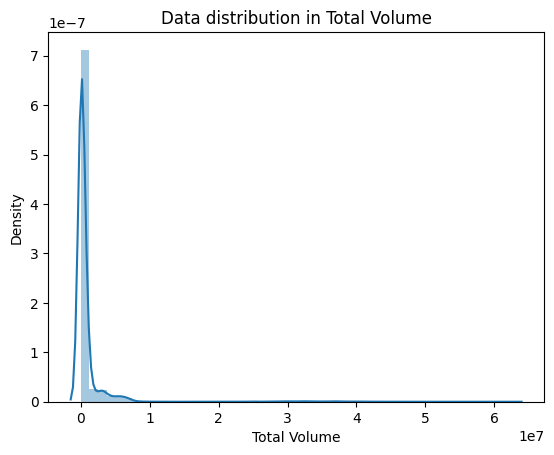

In [43]:
# data distribution in Total Volume
sns.distplot(df['Total Volume'])
plt.title('Data distribution in Total Volume')
plt.show()

Right skewed data in Total Volume.

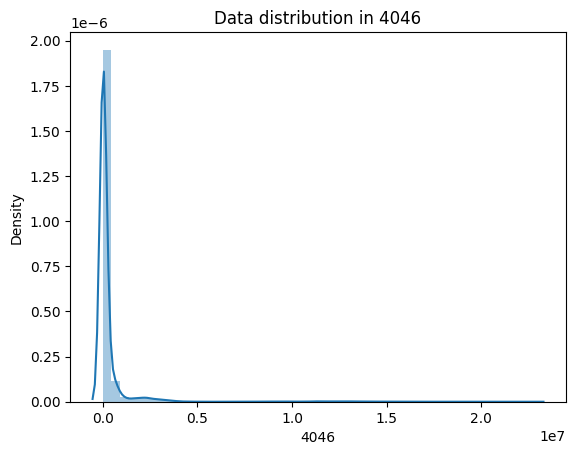

In [44]:
# data distribution in 4046
sns.distplot(df['4046'])
plt.title('Data distribution in 4046')
plt.show()

right skewed data in 4046.

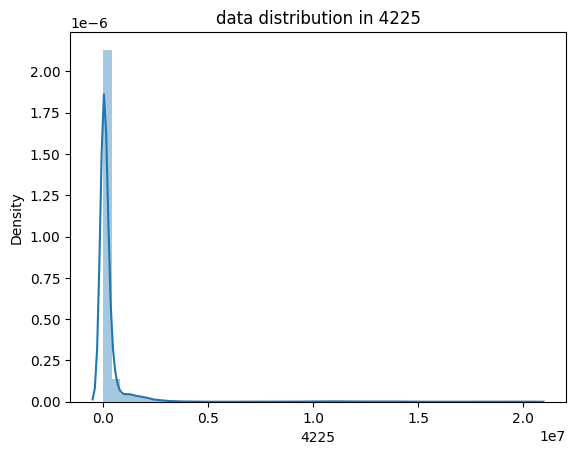

In [45]:
# Data distribution in 4225
sns.distplot(df['4225'])
plt.title('data distribution in 4225')
plt.show()

Right skewed data in 4225.

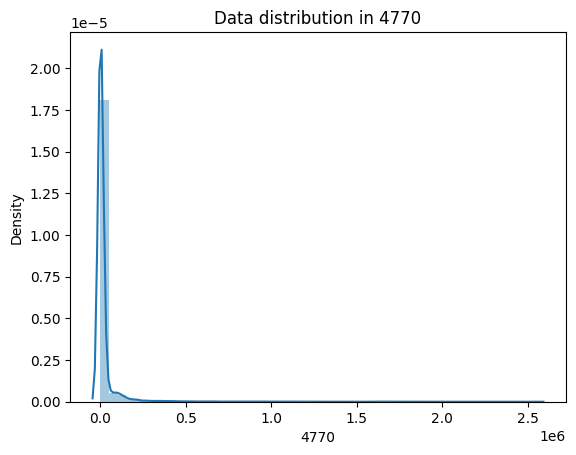

In [46]:
# data distribution in 4770
sns.distplot(df['4770'])
plt.title('Data distribution in 4770')
plt.show()

Right Skewed data in 4770.

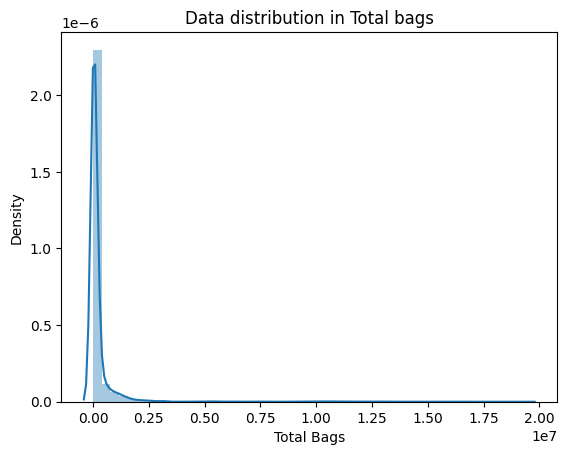

In [47]:
# data distribution in Total bags
sns.distplot(df['Total Bags'])
plt.title('Data distribution in Total bags')
plt.show()

Right skewed data in Total bags.

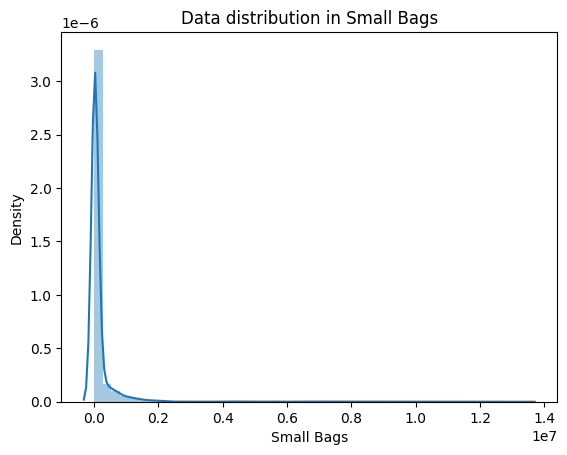

In [48]:
# Data distribution in Small bags
sns.distplot(df['Small Bags'])
plt.title('Data distribution in Small Bags')
plt.show()

Right skewed data in Small bags

Text(0.5, 1.0, 'Data distribution in Large Bags')

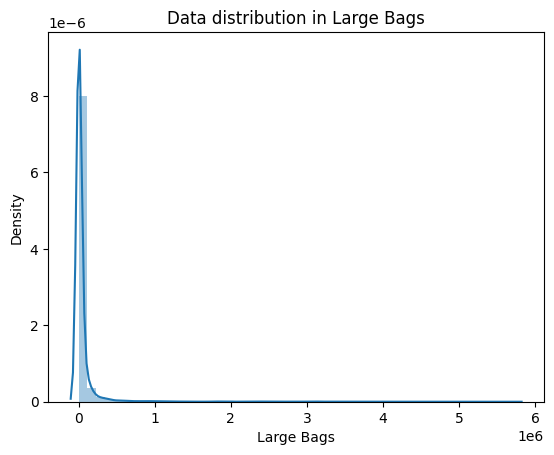

In [49]:
# Data Distribution in Large Bags
sns.distplot(df['Large Bags'])
plt.title('Data distribution in Large Bags')

Right Skewed data in Large Bags.

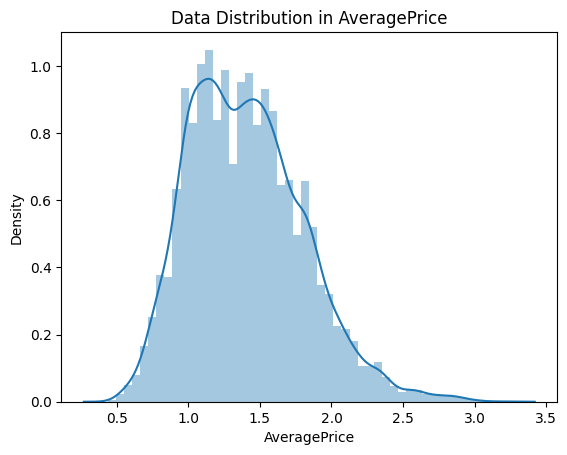

In [50]:
# data dustribution in Average Price
sns.distplot(df['AveragePrice'])
plt.title('Data Distribution in AveragePrice')
plt.show()

Normal distribution in Average Price.

Bivariate

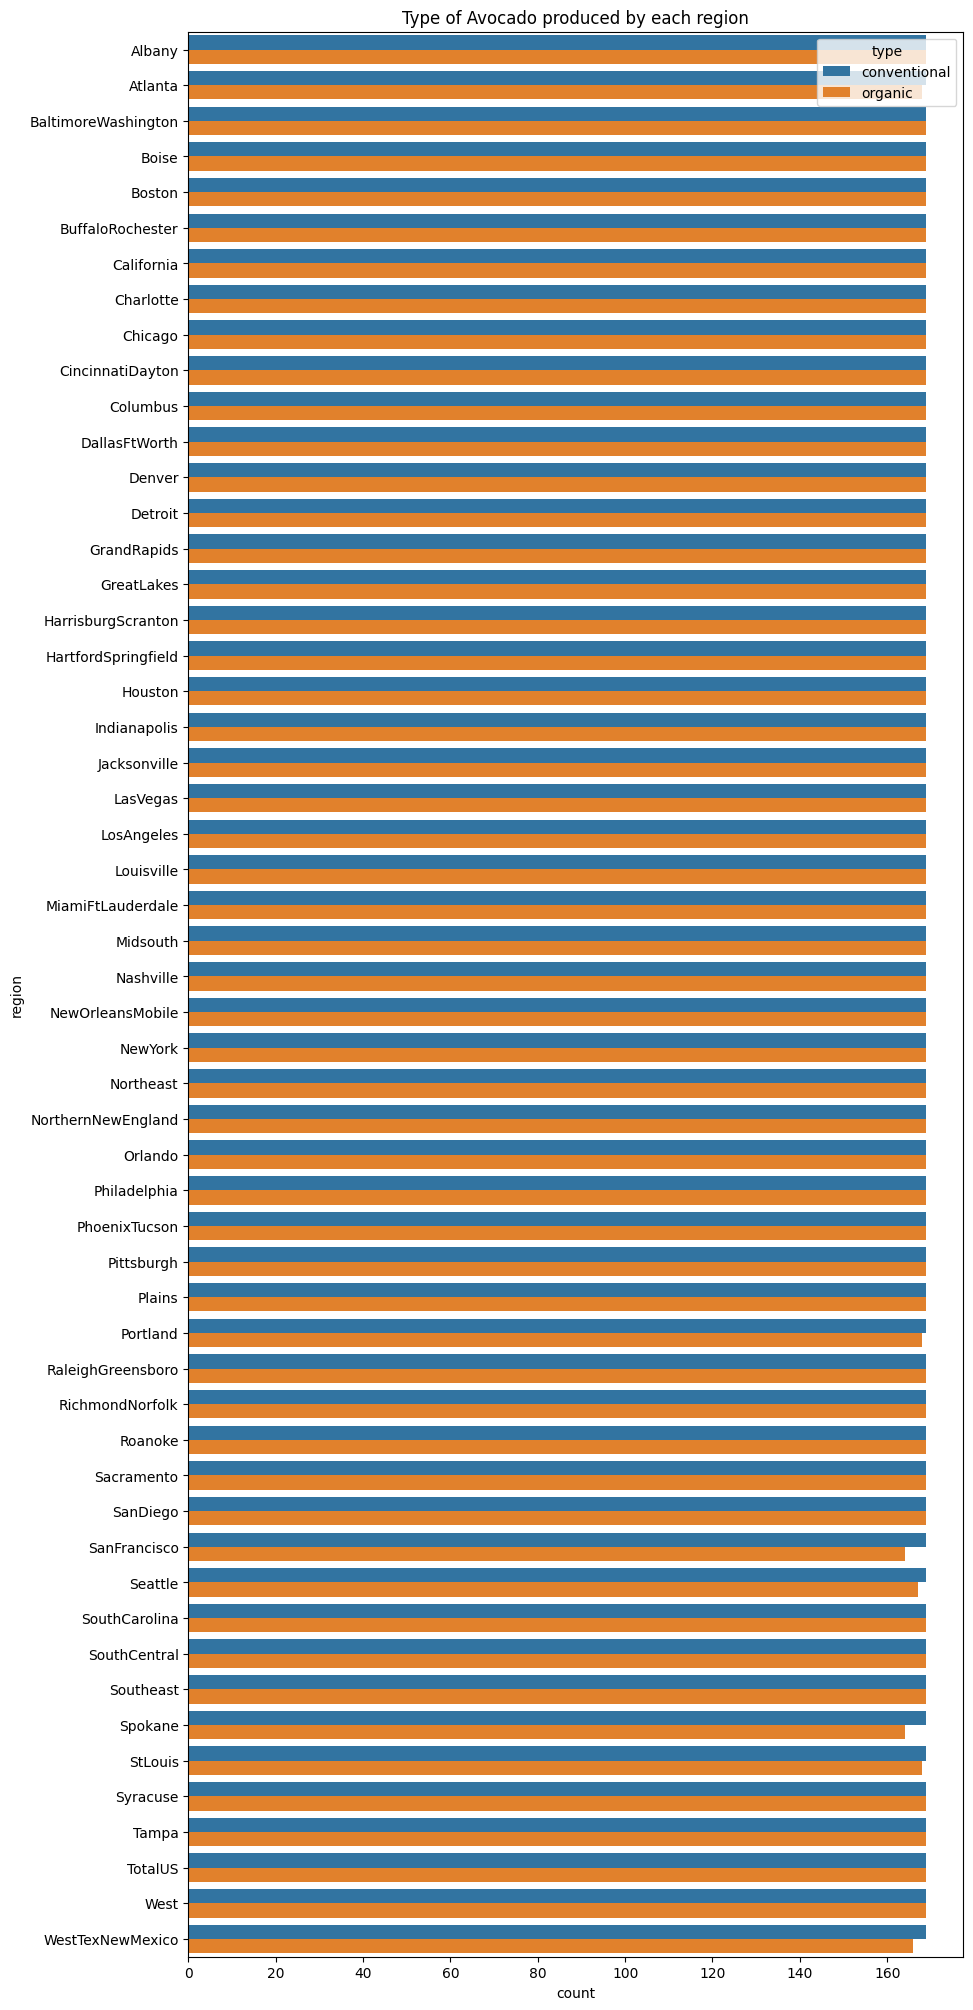

In [59]:
# type of avocado produced by each region
plt.figure(figsize=(10,25))
sns.countplot(y='region',data=df,hue='type')
plt.title('Type of Avocado produced by each region')
plt.show()

All regions produce both type of avocados equally.

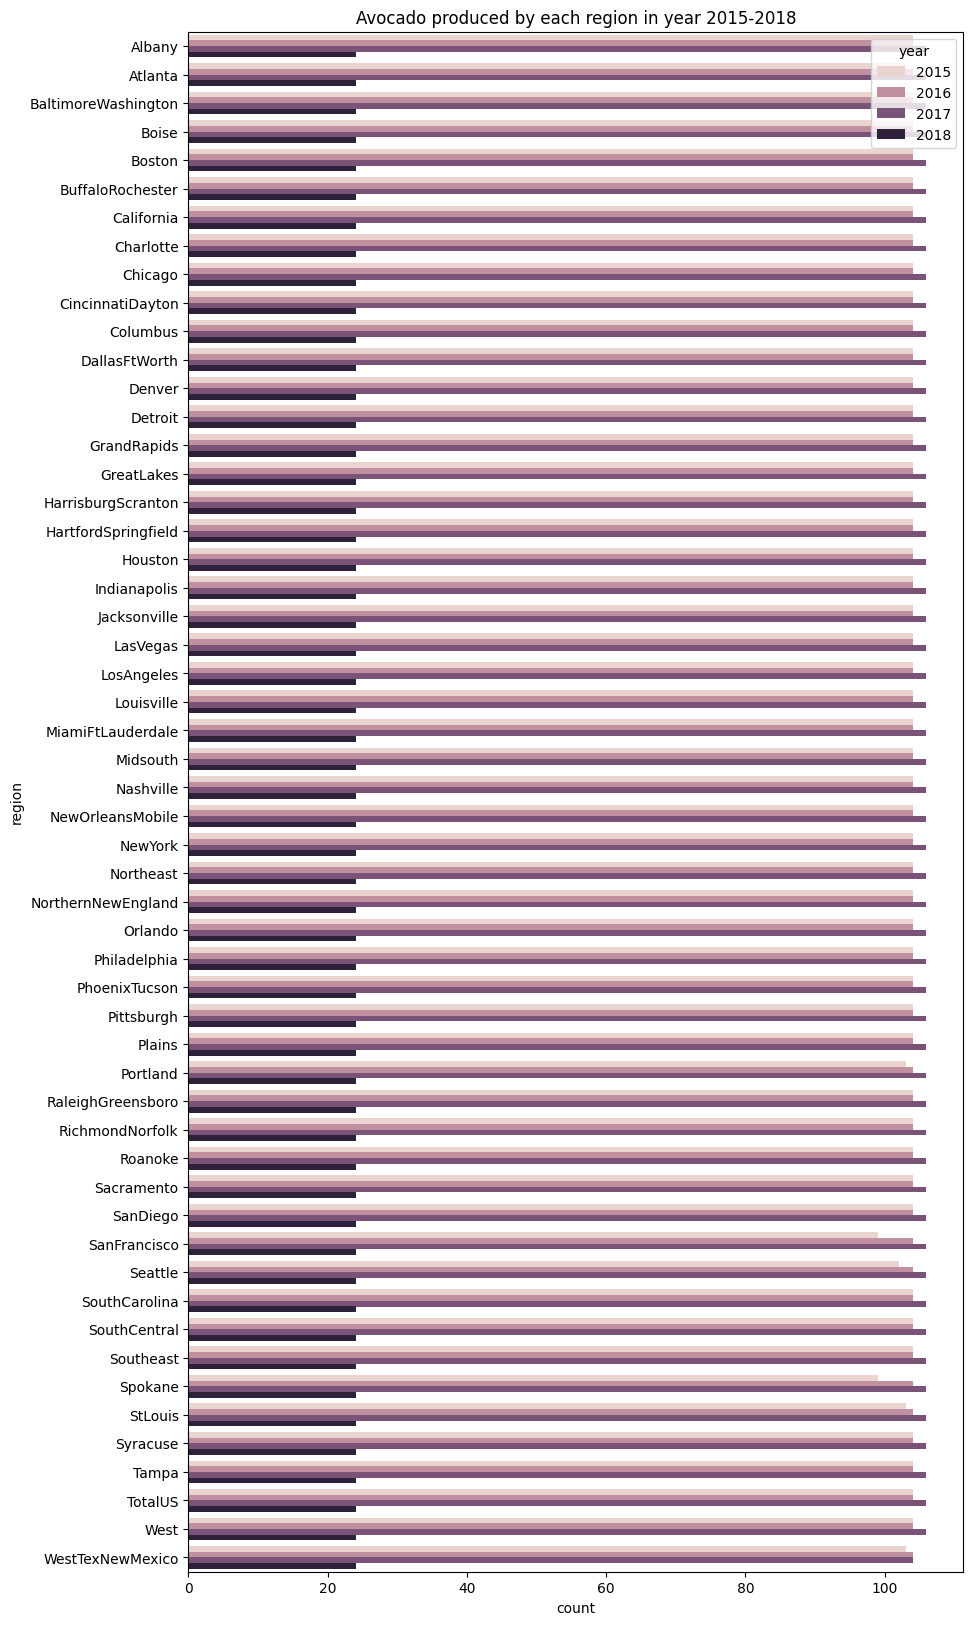

In [62]:
# avocado produced by region in each year
plt.figure(figsize=(10,20))
sns.countplot(y='region',data=df,hue='year')
plt.title('Avocado produced by each region in year 2015-2018')
plt.show()

production of avocado by each region is highest in 2017 and lowest in 2018 

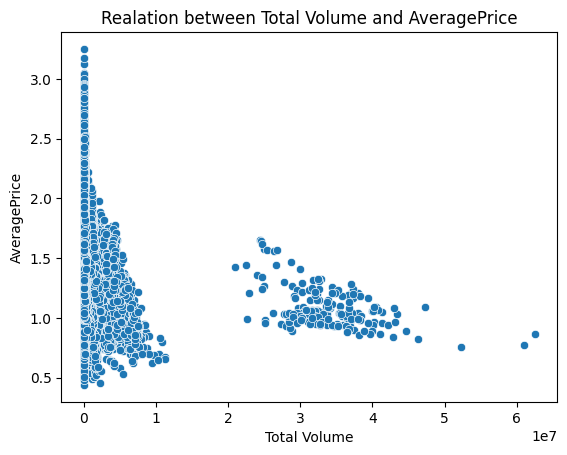

In [64]:
# relation between Total Volume and average price
sns.scatterplot(x='Total Volume',y='AveragePrice',data=df)
plt.title('Realation between Total Volume and AveragePrice')
plt.show()

Total Volume has little negative relation with AveragePrice.

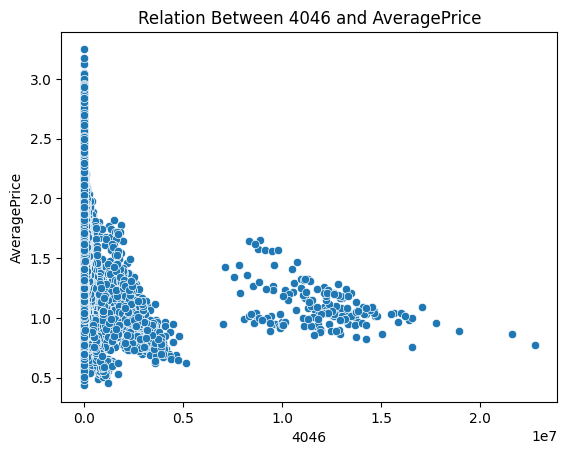

In [65]:
# relation Between 4046 and AveragePrice
sns.scatterplot(x='4046',y='AveragePrice',data=df)
plt.title('Relation Between 4046 and AveragePrice')
plt.show()

4046 has negative relation with Average price.

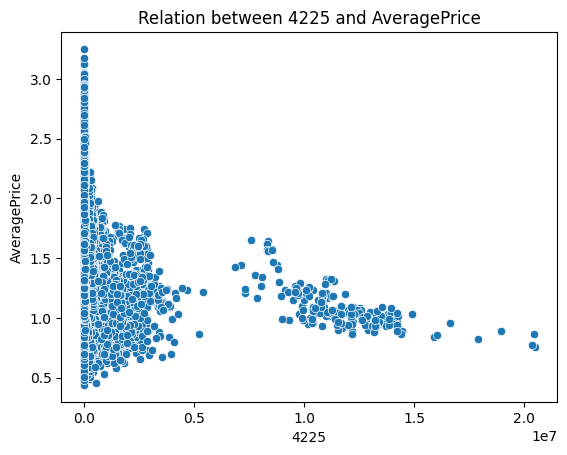

In [66]:
# Relation Between 4225 and average price
sns.scatterplot(x='4225',y='AveragePrice',data=df)
plt.title(('Relation between 4225 and AveragePrice'))
plt.show()

4225 has negative relation with average price.

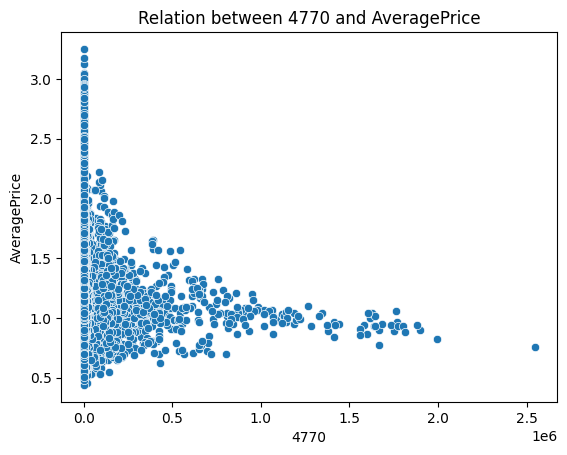

In [67]:
# Relation between 4770 and Average price
sns.scatterplot(x='4770',y='AveragePrice',data=df)
plt.title('Relation between 4770 and AveragePrice')
plt.show()

4770 has negative correlation with average price. 

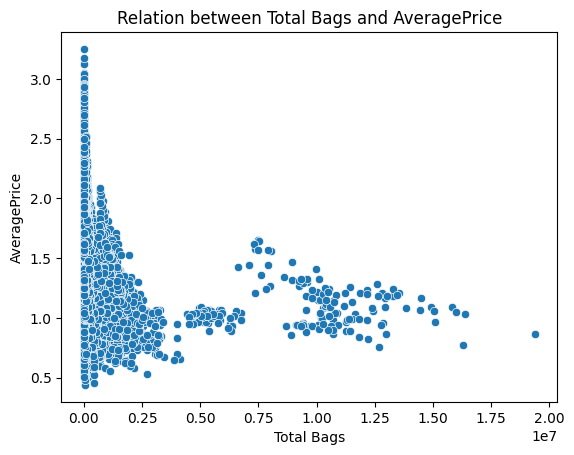

In [68]:
# Relation Between Total bags and Average price
sns.scatterplot(x='Total Bags',y='AveragePrice',data=df)
plt.title('Relation between Total Bags and AveragePrice')
plt.show()

Total bags has negative relation with average price

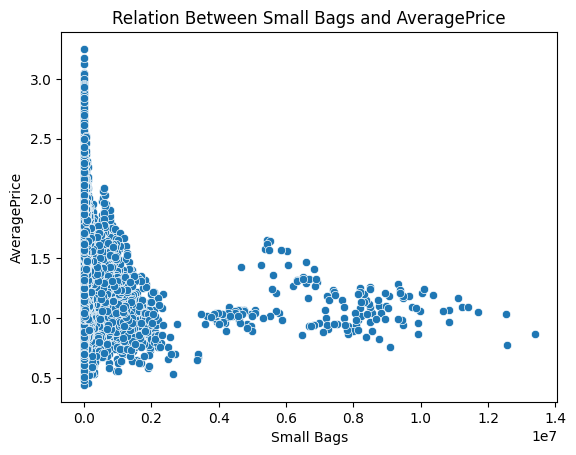

In [69]:
# Realtion between Small Bags and AveragePrice
sns.scatterplot(x='Small Bags',y='AveragePrice',data=df)
plt.title('Relation Between Small Bags and AveragePrice')
plt.show()

Small Bags has negative relation with average price.

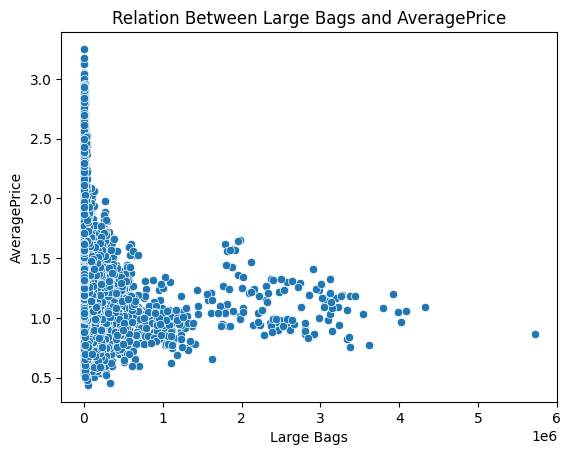

In [70]:
# Relation between Large Bags and Average Price
sns.scatterplot(x='Large Bags',y='AveragePrice',data=df)
plt.title('Relation Between Large Bags and AveragePrice')
plt.show()

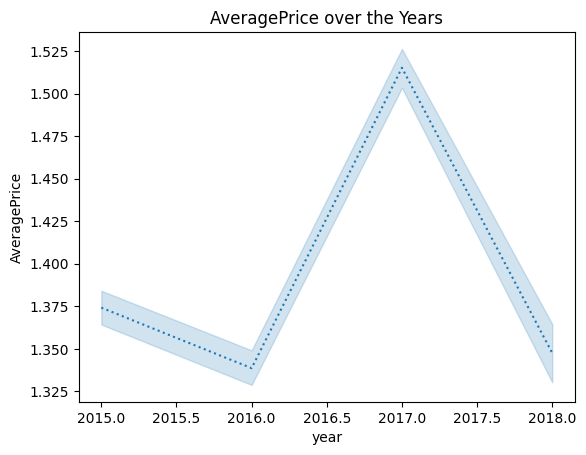

In [79]:
# Average price over the years
sns.lineplot(x='year',y='AveragePrice',data=df,linestyle='dotted')
plt.title('AveragePrice over the Years')
plt.show()

high increment of average price is between 2016 to 2017.

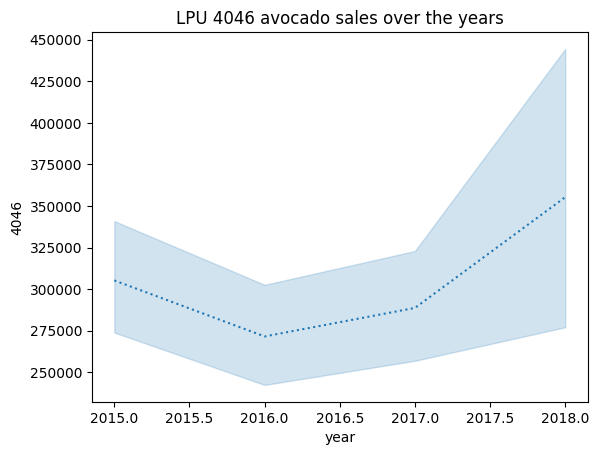

In [80]:
# 4046 avocado sale over the years
sns.lineplot(x='year',y='4046',data=df,linestyle='dotted')
plt.title('LPU 4046 avocado sales over the years')
plt.show()

 Sale of LPU 4046 avocado increased between 2017 to 2018.

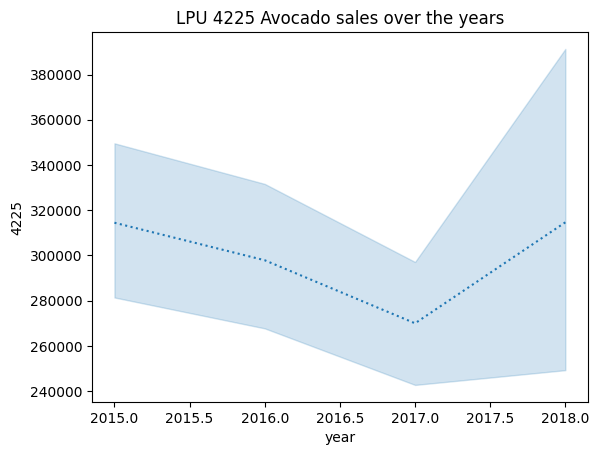

In [81]:
# 4225 Avocado sales over the years
sns.lineplot(x='year',y='4225',data=df,linestyle='dotted')
plt.title('LPU 4225 Avocado sales over the years')
plt.show()

sale of LPU 4225 avocado is increased between 2017 to 2018.

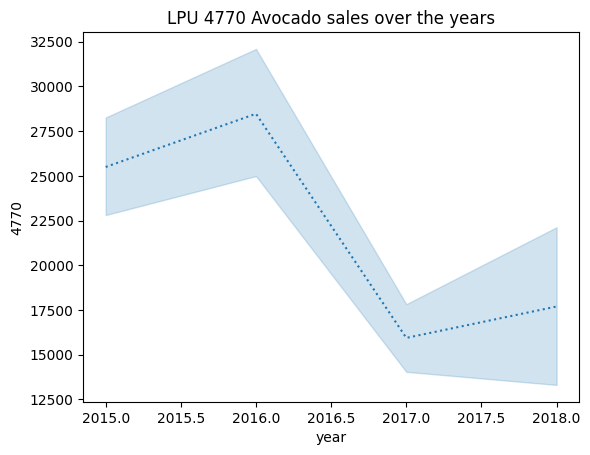

In [82]:
# 4770 Avocado sales over the years
sns.lineplot(x='year',y='4770',data=df,linestyle='dotted')
plt.title('LPU 4770 Avocado sales over the years')
plt.show()

Sale of LPU 4770 avocado is highest between 2015 to 2016

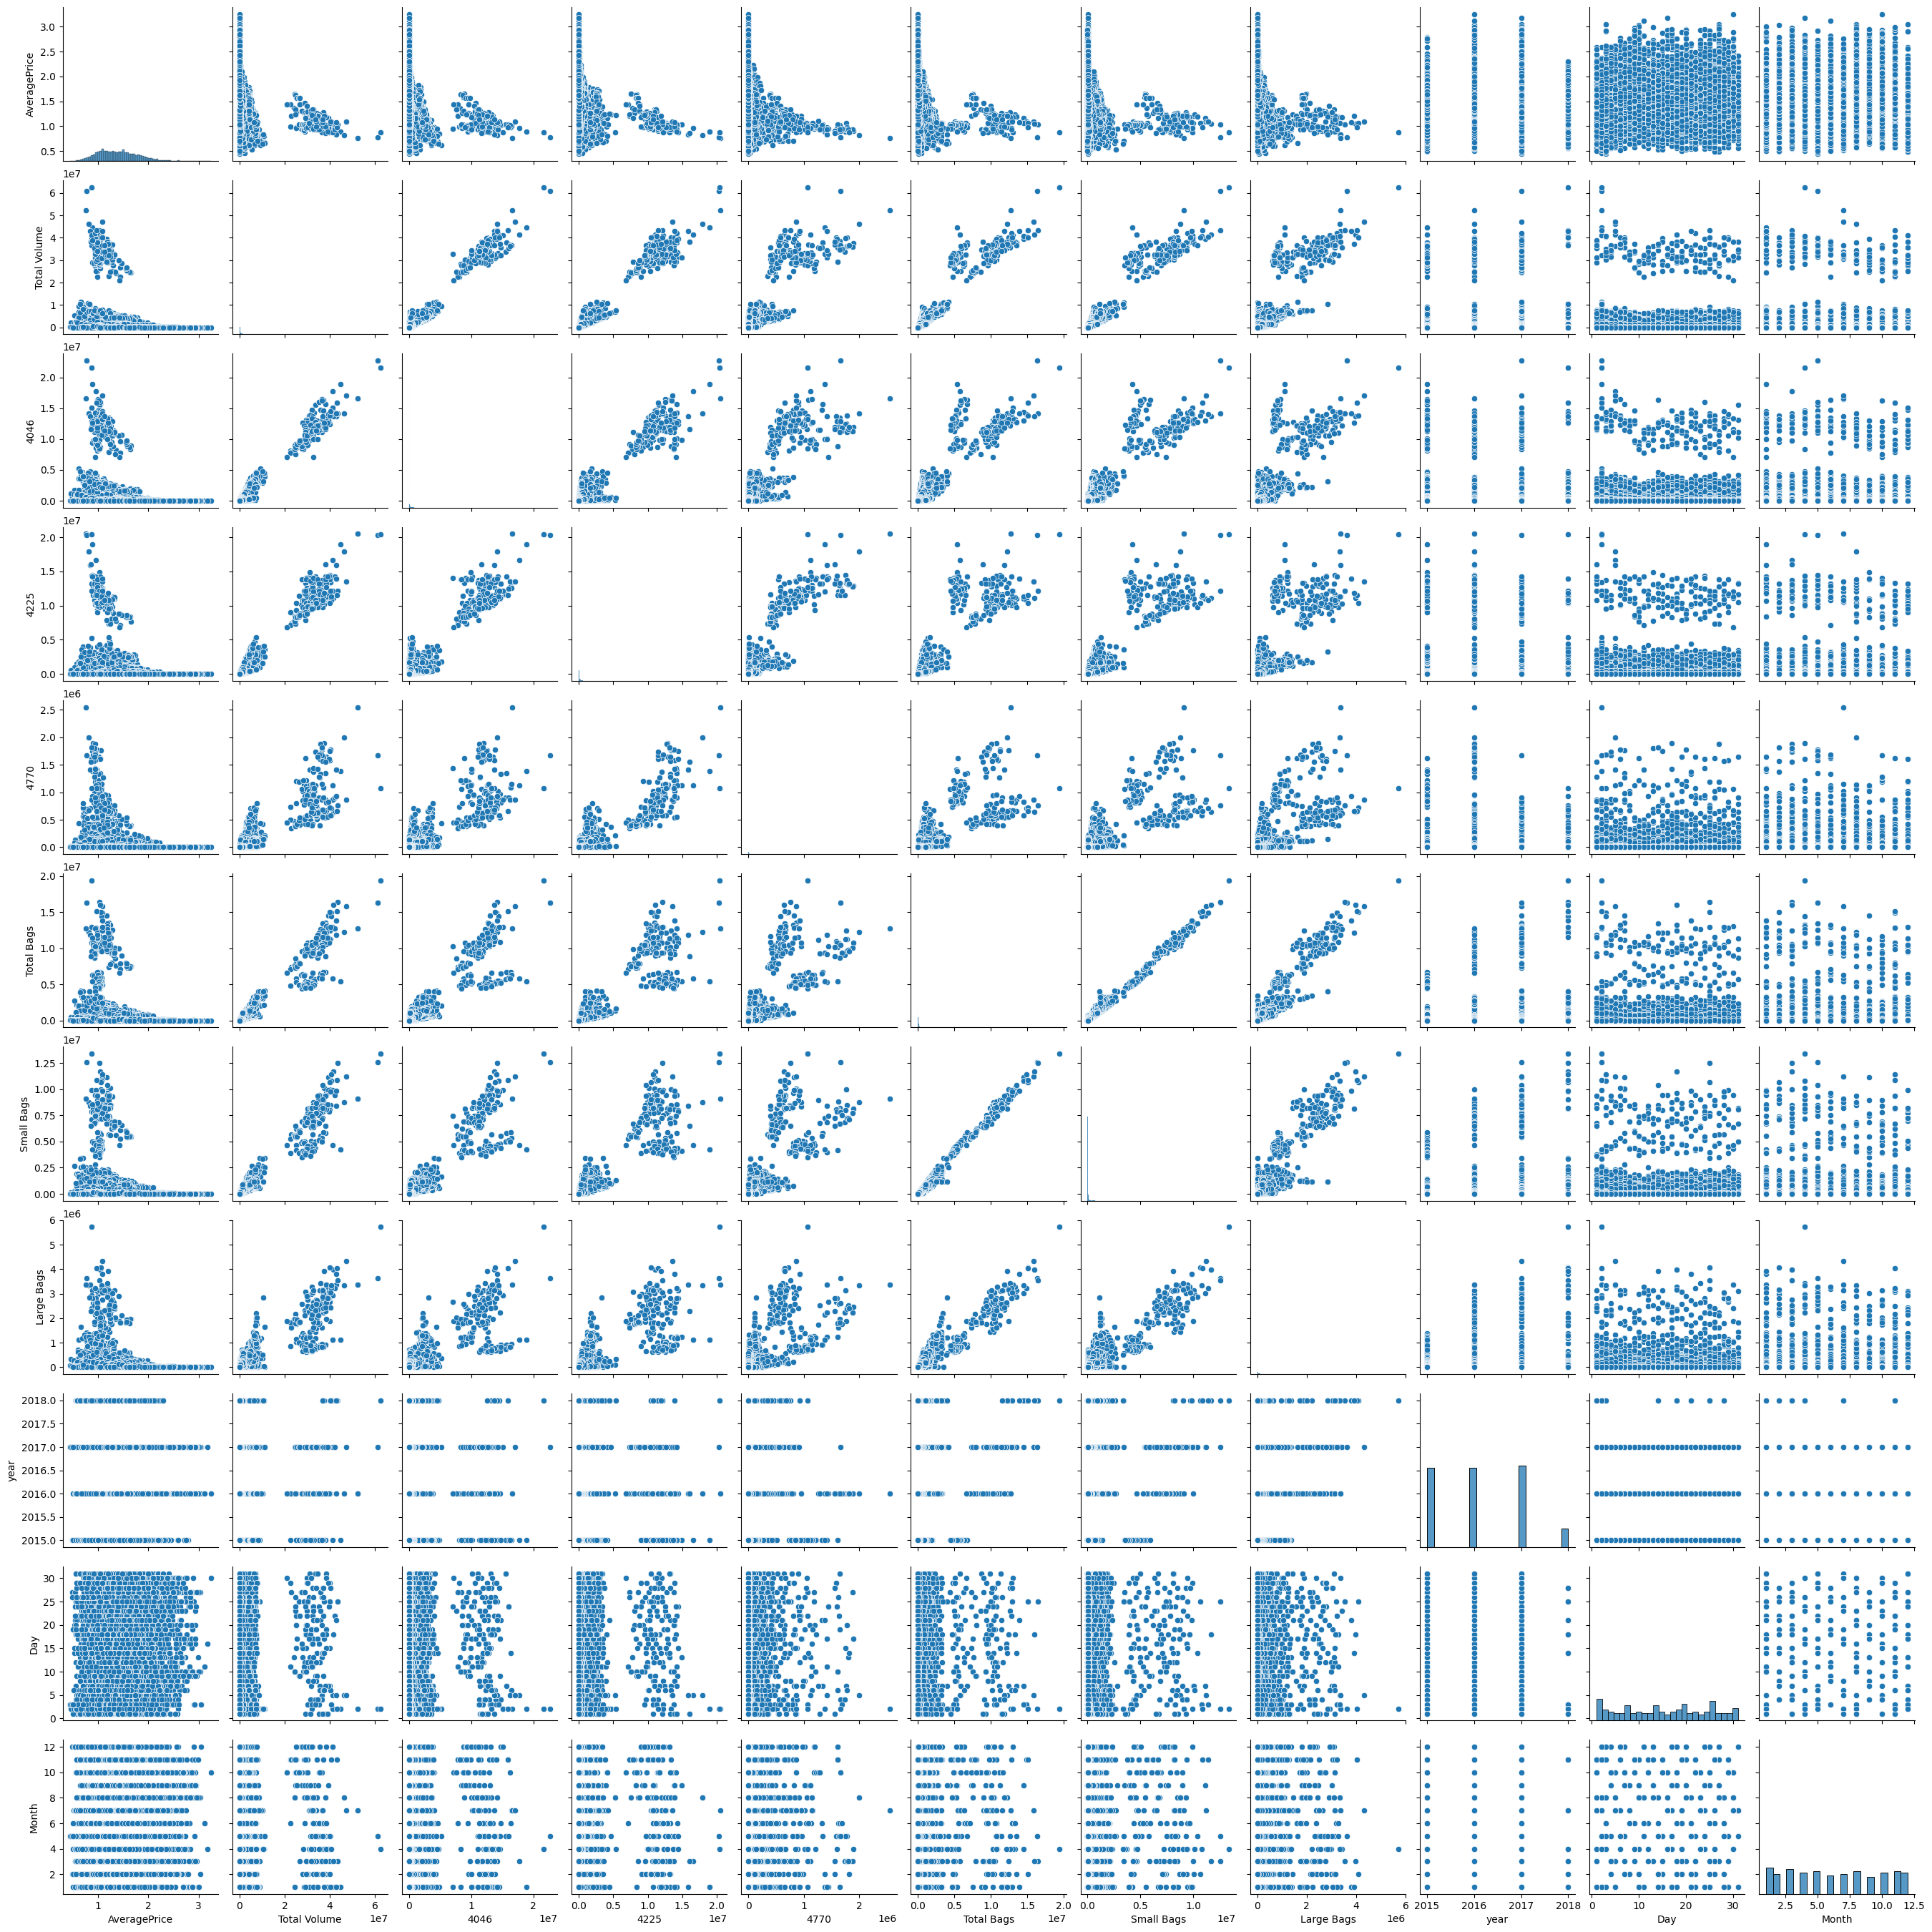

In [83]:
# Pairplot
sns.pairplot(df)
plt.show()

We can see here distribution of each column and relation of one column to another column.

In [84]:
# Creating a copy to check model performance on data without having 0 as value.
df1=df.copy()

# Outliers and skewness

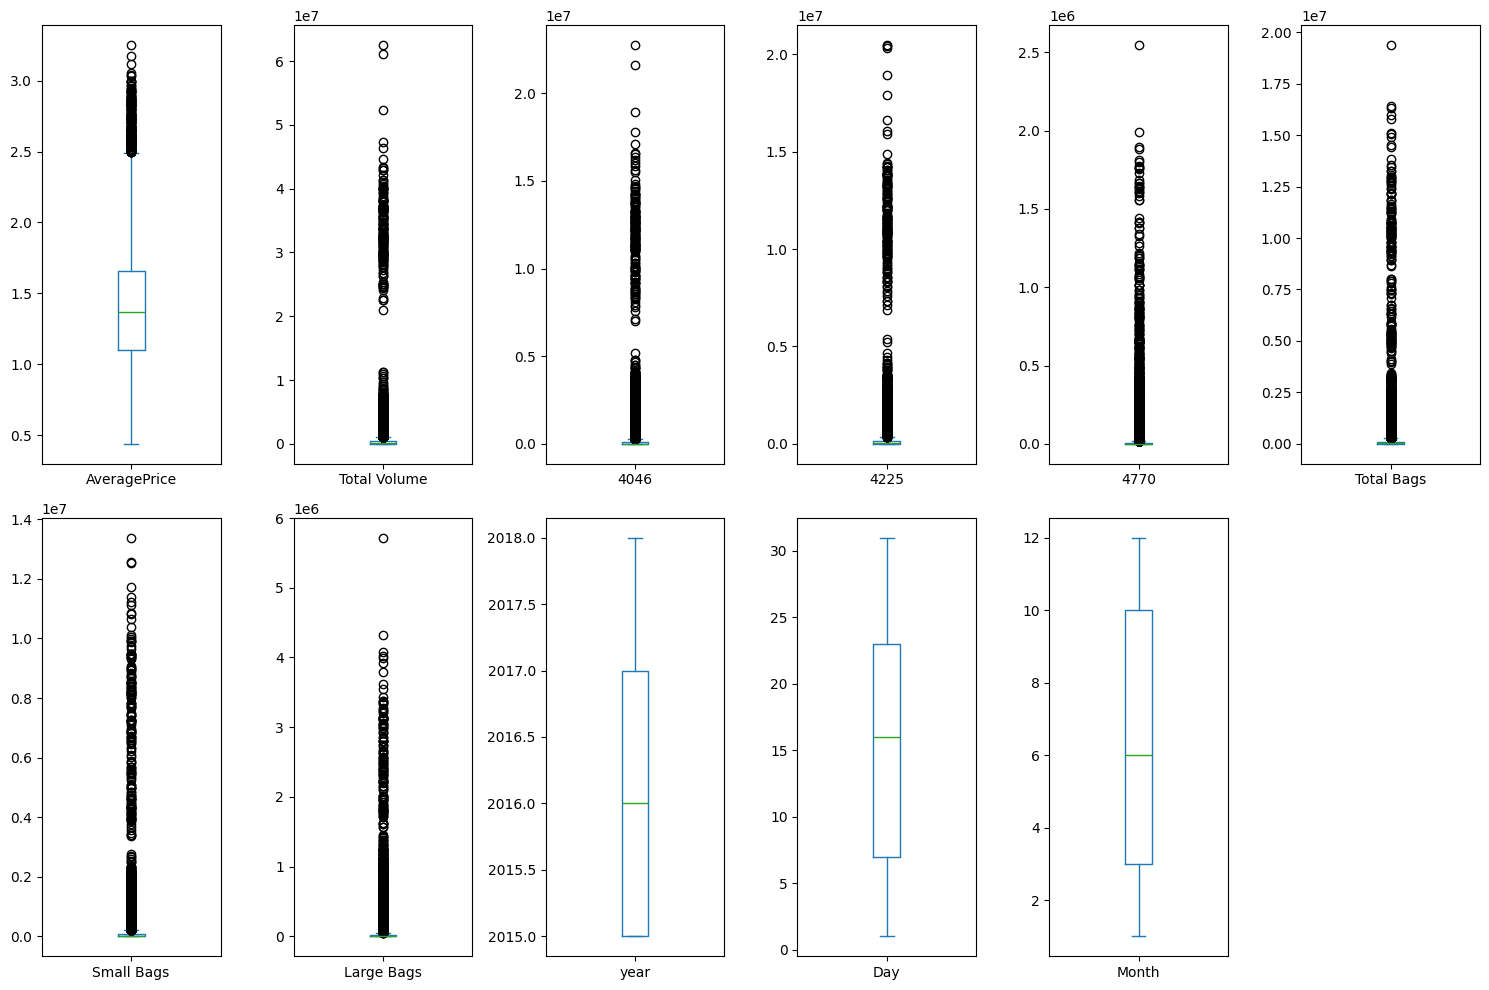

In [85]:
# Plotting box plot to check ouliers
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,10))
plt.tight_layout()
plt.show()

Outliers are present in Average Price, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags.

In [86]:
# Importing Zscore
from scipy.stats import zscore

In [88]:
z=np.abs(zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']]))
z

AveragePrice  Total Volume      4046      4225      4770  \
Date                                                                   
2015-12-27      0.187796      0.227827  0.230913  0.200018  0.212183   
2015-12-20      0.138096      0.230536  0.231200  0.208167  0.212088   
2015-12-13      1.181804      0.212201  0.231105  0.154612  0.211417   
2015-06-12      0.809051      0.223556  0.230838  0.185472  0.211955   
2015-11-29      0.312047      0.231647  0.230989  0.208832  0.211926   
...                  ...           ...       ...       ...       ...   
2018-04-02      0.557709      0.241478  0.230115  0.243956  0.212631   
2018-01-28      0.756510      0.242400  0.230791  0.242377  0.212631   
2018-01-21      1.154113      0.242436  0.230791  0.243190  0.205859   
2018-01-14      1.303214      0.241730  0.230525  0.242751  0.205868   
2018-07-01      0.532859      0.241358  0.229445  0.243270  0.210542   

            Total Bags  Small Bags  Large Bags  
Date                                            
2015-12-27    0.234280    0.232757    0.222448  
2015-12-20    0.233460    0.231680    0.222431  
2015-12-13    0.234839    0.233509    0.222408  
2015-06-12    0.237204    0.236678    0.222282  
2015-11-29    0.236827    0.236264    0.222020  
...                ...         ...         ...  
2018-04-02    0.229412    0.226778    0.221061  
2018-01-28    0.233704    0.232307    0.221500  
2018-01-21    0.233573    0.231755    0.222657  
2018-01-14    0.231976    0.229655    0.222626  
2018-07-01    0.230917    0.228223    0.222724  

[18234 rows x 8 columns]

In [89]:
# Threshold=3
print(np.where(z>3))

(array([  346,   359,   783, ..., 17289, 17387, 17413], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [90]:
# Removing outliers
dfn=df[np.abs(z<3).all(axis=1)]
dfn.shape

(17723, 13)

In [92]:
df.shape

(18234, 13)

In [93]:
# Data removed from dataset due to outliers
Difference=df.shape[0]-dfn.shape[0]
print('"{}" rows has been removed due to outliers. which is "{}"% of data.'.format(Difference,round(Difference/df.shape[0]*100,2)))

"511" rows has been removed due to outliers. which is "2.8"% of data.


Skewness

In [94]:
dfn.skew()

AveragePrice    0.382910
Total Volume    3.666868
4046            4.700296
4225            4.303592
4770            4.970668
Total Bags      3.977539
Small Bags      4.215625
Large Bags      4.937334
year            0.224502
Day            -0.004740
Month           0.046133
dtype: float64

Skewness is present in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags.

In [95]:
# using cbrt
dfn['Total Volume']=np.cbrt(dfn['Total Volume'])
dfn['4046']=np.cbrt(dfn['4046'])
dfn['4225']=np.cbrt(dfn['4225'])
dfn['4770']=np.cbrt(dfn['4770'])
dfn['Total Bags']=np.cbrt(dfn['Total Bags'])
dfn['Small Bags']=np.cbrt(dfn['Small Bags'])
dfn['Large Bags']=np.cbrt(dfn['Large Bags'])

In [96]:
dfn.skew()

AveragePrice    0.382910
Total Volume    1.250558
4046            1.552896
4225            1.273854
4770            1.633658
Total Bags      1.258646
Small Bags      1.281430
Large Bags      1.278339
year            0.224502
Day            -0.004740
Month           0.046133
dtype: float64

In [97]:
# using Sqrt
dfn['Total Volume']=np.sqrt(dfn['Total Volume'])
dfn['4046']=np.sqrt(dfn['4046'])
dfn['4225']=np.sqrt(dfn['4225'])
dfn['4770']=np.sqrt(dfn['4770'])
dfn['Total Bags']=np.sqrt(dfn['Total Bags'])
dfn['Small Bags']=np.sqrt(dfn['Small Bags'])
dfn['Large Bags']=np.sqrt(dfn['Large Bags'])

In [98]:
dfn.skew()

AveragePrice    0.382910
Total Volume    0.562538
4046            0.578021
4225            0.390157
4770            0.415225
Total Bags      0.475648
Small Bags      0.311808
Large Bags      0.022570
year            0.224502
Day            -0.004740
Month           0.046133
dtype: float64

In [99]:
dfn.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
type            0
year            0
region          0
Day             0
Month           0
dtype: int64

# Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [100]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [101]:
# encodeing region and type
dfn['region']=LabelEncoder().fit_transform(dfn['region'])
dfn['type']=LabelEncoder().fit_transform(dfn['type'])

In [103]:
dfn.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
type              int32
year              int64
region            int32
Day               int64
Month             int64
dtype: object

# Correlation

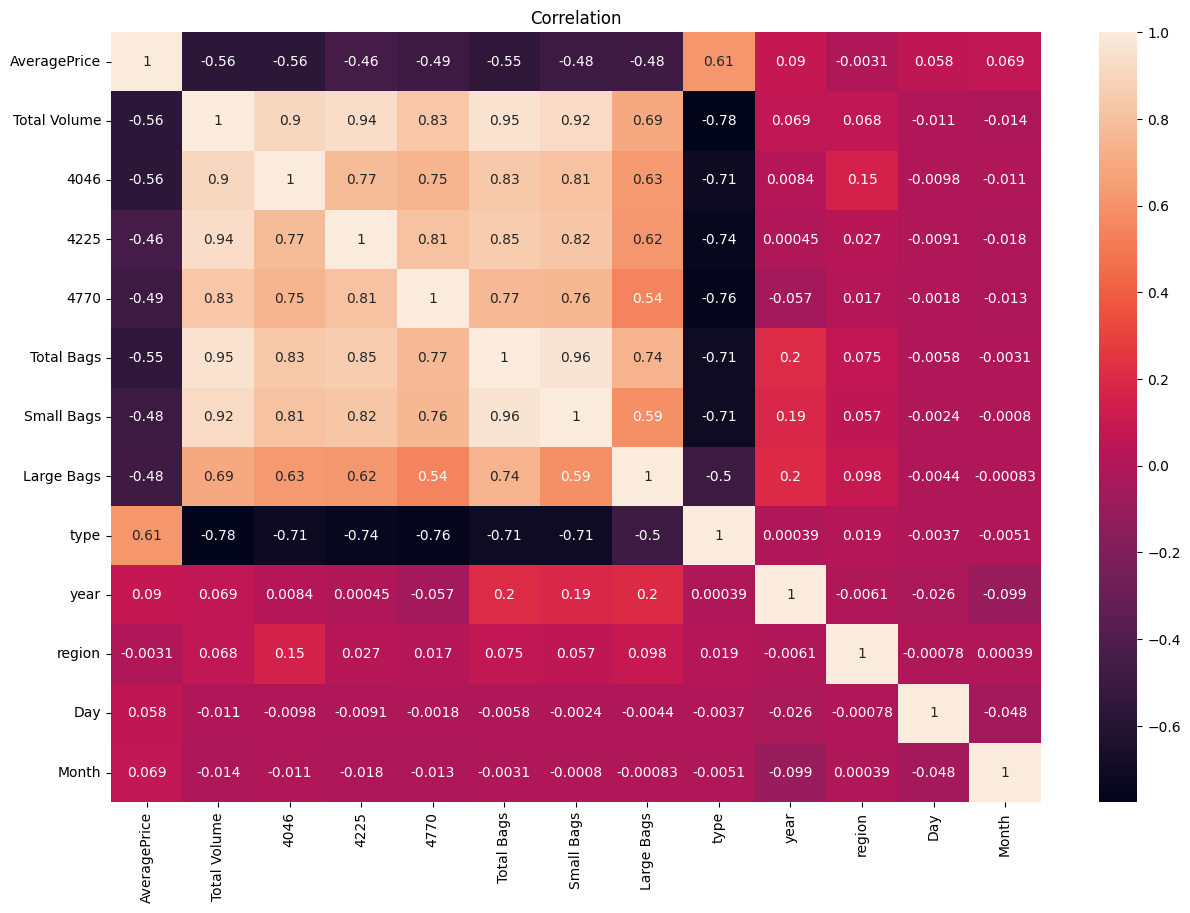

In [106]:
# Visualizing correlation matrix using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dfn.corr(),annot=True)
plt.title('Correlation')
plt.show()

Day and Month niether have strong correlation with region nor with AveragePrice. Hence going to drop these columns.

In [107]:
# Dropping day and Month
dfn.drop(['Day','Month'],axis=1,inplace=True)
dfn.head()

AveragePrice  Total Volume      4046      4225      4770  \
Date                                                                   
2015-12-27          1.33      6.328447  3.181351  6.156579  1.907426   
2015-12-20          1.35      6.164507  2.961238  5.955965  1.969316   
2015-12-13          0.93      7.005653  3.043457  6.913061  2.252173   
2015-06-12          1.08      6.550342  3.228304  6.449584  2.042378   
2015-11-29          1.28      6.090476  3.130655  5.938031  2.057118   

            Total Bags  Small Bags  Large Bags  type  year  region  
Date                                                                
2015-12-27    4.534825    4.526684    2.129486     0  2015       0  
2015-12-20    4.602526    4.594625    2.145326     0  2015       0  
2015-12-13    4.485577    4.476060    2.165565     0  2015       0  
2015-06-12    4.240110    4.223686    2.261454     0  2015       0  
2015-11-29    4.284278    4.261141    2.413593     0  2015       0

In [108]:
# Splitting input and output data
xc=dfn.drop('region',axis=1)
yc=dfn['region']

In [109]:
xc

AveragePrice  Total Volume      4046      4225      4770  \
Date                                                                   
2015-12-27          1.33      6.328447  3.181351  6.156579  1.907426   
2015-12-20          1.35      6.164507  2.961238  5.955965  1.969316   
2015-12-13          0.93      7.005653  3.043457  6.913061  2.252173   
2015-06-12          1.08      6.550342  3.228304  6.449584  2.042378   
2015-11-29          1.28      6.090476  3.130655  5.938031  2.057118   
...                  ...           ...       ...       ...       ...   
2018-04-02          1.63      5.074494  3.563293  3.394252  0.000000   
2018-01-28          1.71      4.902755  3.256076  3.883715  0.000000   
2018-01-21          1.87      4.895593  3.256176  3.672344  2.999273   
2018-01-14          1.93      5.030477  3.393671  3.793685  2.998634   
2018-07-01          1.62      5.094832  3.775163  3.647818  2.465353   

            Total Bags  Small Bags  Large Bags  type  year  
Date                                                        
2015-12-27    4.534825    4.526684    2.129486     0  2015  
2015-12-20    4.602526    4.594625    2.145326     0  2015  
2015-12-13    4.485577    4.476060    2.165565     0  2015  
2015-06-12    4.240110    4.223686    2.261454     0  2015  
2015-11-29    4.284278    4.261141    2.413593     0  2015  
...                ...         ...         ...   ...   ...  
2018-04-02    4.879573    4.853201    2.749300     1  2018  
2018-01-28    4.582892    4.555715    2.621819     1  2018  
2018-01-21    4.593488    4.590034    1.866697     1  2018  
2018-01-14    4.713730    4.710143    1.919383     1  2018  
2018-07-01    4.785737    4.784009    1.721301     1  2018  

[17723 rows x 10 columns]

In [111]:
yc

Date
2015-12-27     0
2015-12-20     0
2015-12-13     0
2015-06-12     0
2015-11-29     0
              ..
2018-04-02    53
2018-01-28    53
2018-01-21    53
2018-01-14    53
2018-07-01    53
Name: region, Length: 17723, dtype: int32

# Scaling

In [112]:
# scaling input data
from sklearn.preprocessing import StandardScaler

In [113]:
xc1=pd.DataFrame(StandardScaler().fit_transform(xc),columns=xc.columns)
xc1

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.192273     -0.242377 -0.721833  0.247789 -0.280729   -0.610563   
1         -0.140364     -0.307813 -0.808307  0.161841 -0.252127   -0.576053   
2         -1.230465      0.027927 -0.776006  0.571887 -0.121409   -0.635667   
3         -0.841143     -0.153808 -0.703387  0.373321 -0.218363   -0.760792   
4         -0.322047     -0.337362 -0.741750  0.154158 -0.211551   -0.738278   
...             ...           ...       ...       ...       ...         ...   
17718      0.586371     -0.742888 -0.571784 -0.935665 -1.162218   -0.434830   
17719      0.794009     -0.811437 -0.692477 -0.725966 -1.162218   -0.586061   
17720      1.209286     -0.814295 -0.692438 -0.816523  0.223852   -0.580660   
17721      1.365015     -0.760457 -0.638422 -0.764537  0.223557   -0.519367   
17722      0.560416     -0.734770 -0.488549 -0.827030 -0.022891   -0.482662   

       Small Bags  Large Bags      type      year  
0       -0.413420   -0.703796 -1.013349 -1.214294  
1       -0.379684   -0.696543 -1.013349 -1.214294  
2       -0.438558   -0.687278 -1.013349 -1.214294  
3       -0.563877   -0.643376 -1.013349 -1.214294  
4       -0.545278   -0.573722 -1.013349 -1.214294  
...           ...         ...       ...       ...  
17718   -0.251285   -0.420024  0.986827  1.974150  
17719   -0.399005   -0.478389  0.986827  1.974150  
17720   -0.381964   -0.824109  0.986827  1.974150  
17721   -0.322322   -0.799988  0.986827  1.974150  
17722   -0.285644   -0.890677  0.986827  1.974150  

[17723 rows x 10 columns]

# Multicollinearity

In [114]:
# Importing Vif library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Creating function
def calc_vif(data):
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif

In [116]:
# Checking vif value
calc_vif(xc1)

Columns        VIF
0  AveragePrice   2.064803
1  Total Volume  96.536399
2          4046  10.682360
3          4225  19.731474
4          4770   3.796421
5    Total Bags  49.085614
6    Small Bags  22.321774
7    Large Bags   3.885397
8          type   3.380893
9          year   1.399807

Total Volume has highes vif value. hence going to drop it.

In [119]:
# Dropping Total Volume
xc1.drop('Total Volume',axis=1,inplace=True)

In [120]:
calc_vif(xc1)

Columns        VIF
0  AveragePrice   2.006189
1          4046   4.010999
2          4225   5.433317
3          4770   3.796137
4    Total Bags  36.085262
5    Small Bags  22.195560
6    Large Bags   3.854735
7          type   3.369561
8          year   1.390632

Going to drop Total bags due to high vif value.

In [121]:
# dropping Total Bags
xc1.drop('Total Bags',axis=1,inplace=True)

In [122]:
calc_vif(xc1)

Columns       VIF
0  AveragePrice  1.888644
1          4046  3.953149
2          4225  4.921817
3          4770  3.795861
4    Small Bags  4.978916
5    Large Bags  2.074457
6          type  3.304795
7          year  1.347286

# Class Imbalance

In [124]:
yc.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
10    338
5     338
9     338
20    337
22    337
28    337
33    336
41    336
40    336
14    336
50    336
1     336
25    336
31    335
24    335
21    333
53    332
48    332
7     332
17    331
36    329
29    329
3     329
37    328
6     327
43    324
46    324
47    323
42    298
45    297
15    285
52    256
51    169
Name: region, dtype: int64

Count of class 0 twice the count of class 51. so we have class imbalance problem.going to resole it by using smote resample.

In [125]:
# importing Smote
from imblearn.over_sampling import SMOTE

In [126]:
smt=SMOTE()

In [128]:
#OverSampling
xcn,ycn=smt.fit_resample(xc1,yc)

In [129]:
ycn.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

# Random State

In [130]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [131]:
# Creating random state
def random_state(model,x,y):
    acc=0
    rs=0
    for i in range(1,300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        accuracy=accuracy_score(y_test,model.predict(x_test))
        if accuracy>acc:
            acc=accuracy
            rs=i
    print('best accuracy {} at {} random state.'.format(round(acc*100),rs))

In [133]:
random_state(DecisionTreeClassifier(),xcn,ycn)

best accuracy 81 at 43 random state.


In [134]:
# Splitting training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(xcn,ycn,test_size=0.30,random_state=43)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(12776, 8)
(12776,)
(5476, 8)
(5476,)


# Model

In [136]:
# Importin models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [137]:
# importing classification matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [138]:
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
bgc=BaggingClassifier()

models=[dtc,knn,svc,rfc,adc,gbc,etc,bgc]

In [141]:
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    accuracy=accuracy_score(ytest,pred)
    print(model)
    print('Training Score',model.score(xtrain,ytrain))
    print('accuracy_score',accuracy)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('Cross val score')
    score=cross_val_score(model,xcn,ycn,cv=5)
    print(score)
    print('Differnce between accuracy and cv mean score',accuracy-score.mean())
    print('\n')

DecisionTreeClassifier()
Training Score 1.0
accuracy_score 0.8058802045288532
[[ 82   0   0 ...   0   0   0]
 [  0  74   0 ...   0   0   0]
 [  0   0  86 ...   0   0   4]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   0 110   0]
 [  0   1   0 ...   0   0  76]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       112
           1       0.68      0.74      0.71       100
           2       0.89      0.89      0.89        97
           3       0.77      0.81      0.79        90
           4       0.84      0.82      0.83       106
           5       0.76      0.78      0.77       105
           6       0.95      0.92      0.94       102
           7       0.85      0.79      0.82       108
           8       0.93      0.93      0.93        97
           9       0.77      0.82      0.80        95
          10       0.62      0.63      0.63        93
          11       0.87      0.87      0.87       106
          12       0.84    

Models Are performing well but difference between cv mean score and accuracy score is hugh.

Now going to check model performance on data without rows having value 0 and check the difference between cv mean score and accuracy score on same scoring parameter.

# Model  performance on dataset without 0

In [142]:
df1

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...                  ...           ...      ...        ...     ...   
2018-04-02          1.63      17074.83  2046.96    1529.20    0.00   
2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
2018-07-01          1.62      17489.58  2894.77    2356.13  224.53   

            Total Bags  Small Bags  Large Bags          type  year  \
Date                                                                 
2015-12-27     8696.87     8603.62       93.25  conventional  2015   
2015-12-20     9505.56     9408.07       97.49  conventional  2015   
2015-12-13     8145.35     8042.21      103.14  conventional  2015   
2015-06-12     5811.16     5677.40      133.76  conventional  2015   
2015-11-29     6183.95     5986.26      197.69  conventional  2015   
...                ...         ...         ...           ...   ...   
2018-04-02    13498.67    13066.82      431.85       organic  2018   
2018-01-28     9264.84     8940.04      324.80       organic  2018   
2018-01-21     9394.11     9351.80       42.31       organic  2018   
2018-01-14    10969.54    10919.54       50.00       organic  2018   
2018-07-01    12014.15    11988.14       26.01       organic  2018   

                      region  Day  Month  
Date                                      
2015-12-27            Albany   27     12  
2015-12-20            Albany   20     12  
2015-12-13            Albany   13     12  
2015-06-12            Albany   12      6  
2015-11-29            Albany   29     11  
...                      ...  ...    ...  
2018-04-02  WestTexNewMexico    2      4  
2018-01-28  WestTexNewMexico   28      1  
2018-01-21  WestTexNewMexico   21      1  
2018-01-14  WestTexNewMexico   14      1  
2018-07-01  WestTexNewMexico    1      7  

[18234 rows x 13 columns]

In [146]:
# Removing rows with 0 value
df1=df1[(df['4046']>0) & (df1['4225']>0) & (df1['4770']>0) & (df1['Small Bags']>0) & (df1['Large Bags']>0)]

In [147]:
df1.shape

(11853, 13)

outliers

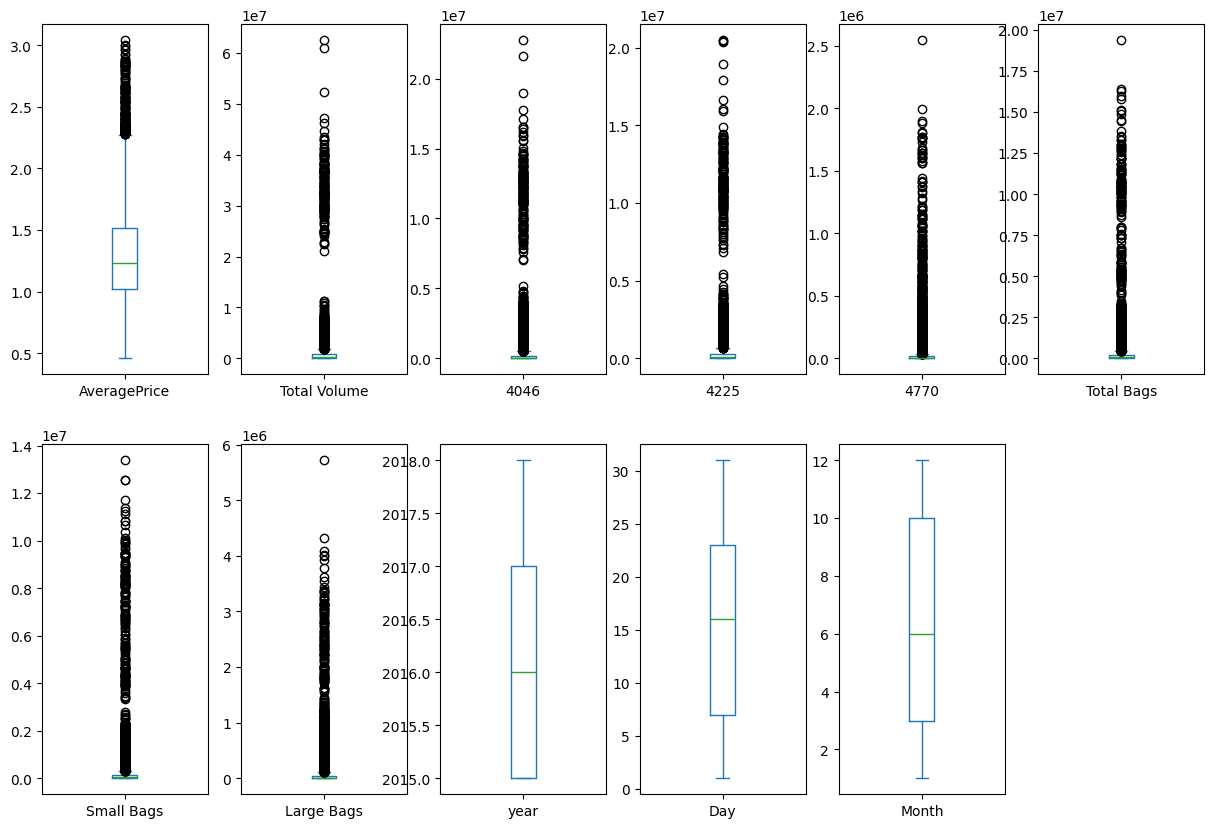

In [151]:
# Boxplot
df1.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,10))
plt.show()

In [152]:
z1=np.abs(zscore(df1[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']]))
z1

AveragePrice  Total Volume      4046      4225      4770  \
Date                                                                   
2015-12-27      0.102554      0.291256  0.288381  0.267280  0.265287   
2015-12-20      0.156522      0.293475  0.288615  0.273951  0.265210   
2015-12-13      0.976823      0.278461  0.288537  0.230107  0.264662   
2015-06-12      0.572057      0.287759  0.288319  0.255371  0.265102   
2015-11-29      0.032369      0.294384  0.288442  0.274495  0.265078   
...                  ...           ...       ...       ...       ...   
2018-07-01      0.507320      0.236041  0.266605  0.261494  0.264455   
2018-11-03      0.723195      0.301237  0.287653  0.302119  0.265585   
2018-01-21      1.559712      0.303219  0.288280  0.302623  0.260127   
2018-01-14      1.721619      0.302641  0.288064  0.302264  0.260134   
2018-07-01      0.885102      0.302336  0.287180  0.302689  0.263949   

            Total Bags  Small Bags  Large Bags  
Date                                            
2015-12-27    0.293866    0.292661    0.276331  
2015-12-20    0.293195    0.291779    0.276317  
2015-12-13    0.294323    0.293276    0.276298  
2015-06-12    0.296259    0.295869    0.276195  
2015-11-29    0.295950    0.295530    0.275982  
...                ...         ...         ...  
2018-07-01    0.135758    0.188342    0.043054  
2018-11-03    0.287176    0.283993    0.275799  
2018-01-21    0.293287    0.291840    0.276501  
2018-01-14    0.291981    0.290122    0.276476  
2018-07-01    0.291114    0.288950    0.276556  

[11853 rows x 8 columns]

In [154]:
# Threshold=3
print(np.where(z1>3))

(array([  747,   751,   755, ..., 11579, 11580, 11581], dtype=int64), array([4, 4, 4, ..., 0, 0, 0], dtype=int64))


In [156]:
dfn1=df1[np.abs(z1<3).all(axis=1)]
dfn1.shape

(11469, 13)

In [157]:
Difference1=df1.shape[0]-dfn1.shape[0]
print('"{}" rows has been removed due to outliers. which is "{}"% of data.'.format(Difference1,round(Difference1/df1.shape[0]*100,2)))

"384" rows has been removed due to outliers. which is "3.24"% of data.


skewness

In [158]:
dfn1.skew()

AveragePrice    0.549037
Total Volume    2.828348
4046            3.642060
4225            3.385575
4770            4.232119
Total Bags      3.245257
Small Bags      3.327390
Large Bags      4.435813
year            0.169905
Day            -0.005633
Month           0.051058
dtype: float64

In [159]:
dfn1['Total Volume']=np.cbrt(dfn1['Total Volume'])
dfn1['4046']=np.cbrt(dfn1['4046'])
dfn1['4225']=np.cbrt(dfn1['4225'])
dfn1['4770']=np.cbrt(dfn1['4770'])
dfn1['Total Bags']=np.cbrt(dfn1['Total Bags'])
dfn1['Small Bags']=np.cbrt(dfn1['Small Bags'])
dfn1['Large Bags']=np.cbrt(dfn1['Large Bags'])

In [160]:
dfn1.skew()

AveragePrice    0.549037
Total Volume    1.039853
4046            1.197295
4225            1.084872
4770            1.389363
Total Bags      1.154020
Small Bags      1.136303
Large Bags      1.083129
year            0.169905
Day            -0.005633
Month           0.051058
dtype: float64

In [161]:
dfn1['Total Volume']=np.sqrt(dfn1['Total Volume'])
dfn1['4046']=np.sqrt(dfn1['4046'])
dfn1['4225']=np.sqrt(dfn1['4225'])
dfn1['4770']=np.sqrt(dfn1['4770'])
dfn1['Total Bags']=np.sqrt(dfn1['Total Bags'])
dfn1['Small Bags']=np.sqrt(dfn1['Small Bags'])
dfn1['Large Bags']=np.sqrt(dfn1['Large Bags'])

In [162]:
dfn1.skew()

AveragePrice    0.549037
Total Volume    0.366973
4046            0.391077
4225            0.369433
4770            0.585789
Total Bags      0.445005
Small Bags      0.296348
Large Bags      0.231169
year            0.169905
Day            -0.005633
Month           0.051058
dtype: float64

Encoding

In [163]:
dfn1['region']=LabelEncoder().fit_transform(dfn1['region'])
dfn1['type']=LabelEncoder().fit_transform(dfn1['type'])

Correlation

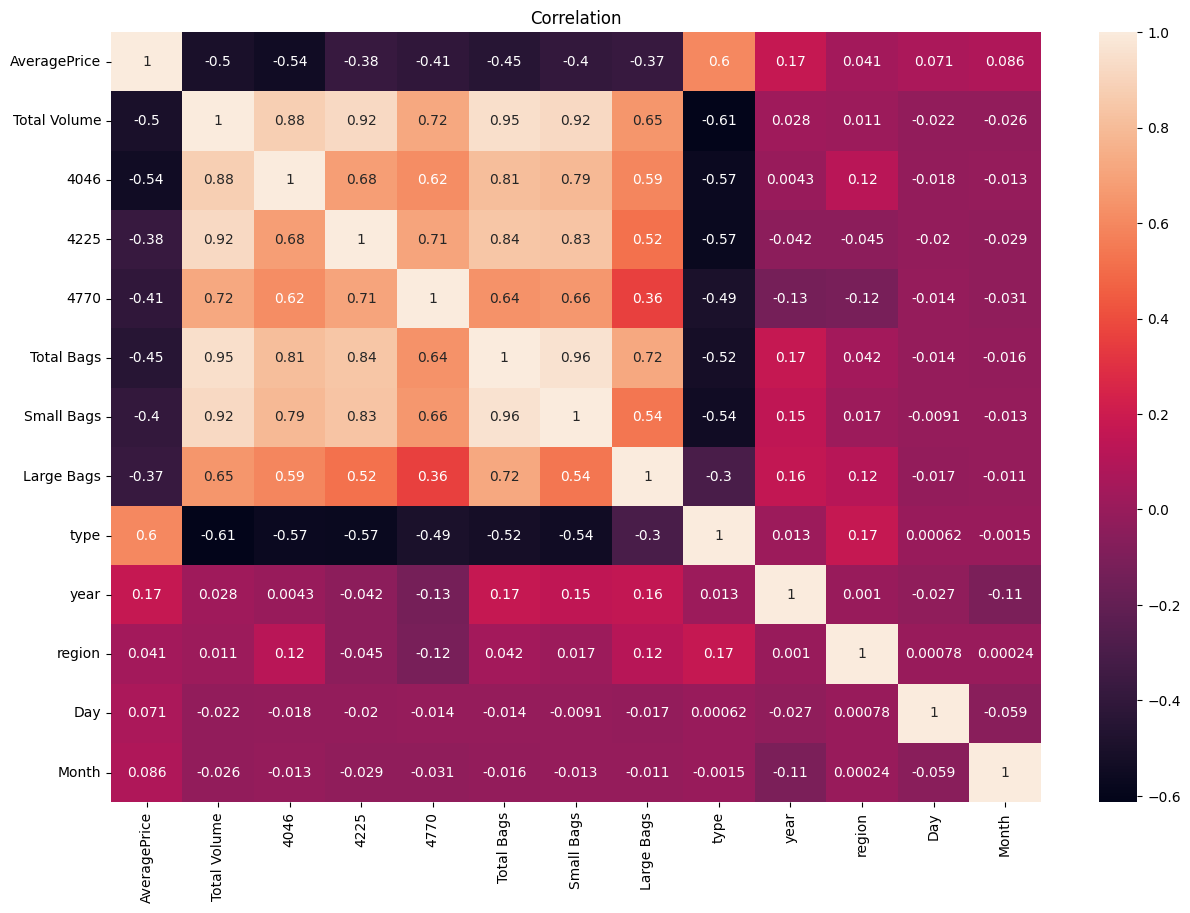

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(dfn1.corr(),annot=True)
plt.title('Correlation')
plt.show()

In [165]:
dfn1.drop(['Day','Month'],axis=1,inplace=True)

Splitting input and output variable

In [166]:
x=dfn1.drop('region',axis=1)
y=dfn1['region']

scaling

In [167]:
x1=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x1

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.125077     -0.830469 -1.249650 -0.279613 -1.094801   -1.256630   
1          0.182260     -0.903272 -1.341644 -0.378512 -1.058025   -1.217550   
2         -1.018592     -0.529731 -1.307282  0.093320 -0.889943   -1.285058   
3         -0.589716     -0.731928 -1.230026 -0.135166 -1.014609   -1.426753   
4         -0.017882     -0.936149 -1.270838 -0.387353 -1.005850   -1.401257   
...             ...           ...       ...       ...       ...         ...   
11464      0.553953     -0.013074 -0.191949 -0.205241 -0.846939    0.537536   
11465      0.782686     -1.287825 -1.076309 -1.422823 -1.372337   -0.954105   
11466      1.669030     -1.466780 -1.218377 -1.504299 -0.445995   -1.222767   
11467      1.840580     -1.406880 -1.160912 -1.444480 -0.446375   -1.153357   
11468      0.954237     -1.378300 -1.001471 -1.516389 -0.763265   -1.111792   

       Small Bags  Large Bags      type      year  
0       -1.003936   -1.436620 -0.594503 -1.272064  
1       -0.965790   -1.427752 -0.594503 -1.272064  
2       -1.032360   -1.416421 -0.594503 -1.272064  
3       -1.174058   -1.362735 -0.594503 -1.272064  
4       -1.153028   -1.277556 -0.594503 -1.272064  
...           ...         ...       ...       ...  
11464    0.303305    1.156652  1.682077  1.955657  
11465   -0.712283   -1.221535  1.682077  1.955657  
11466   -0.968368   -1.583749  1.682077  1.955657  
11467   -0.900932   -1.554252  1.682077  1.955657  
11468   -0.859459   -1.665153  1.682077  1.955657  

[11469 rows x 10 columns]

Multicollinearity

In [168]:
calc_vif(x1)

Columns         VIF
0  AveragePrice    2.088524
1  Total Volume  109.093740
2          4046   13.386596
3          4225   24.054507
4          4770    2.305914
5    Total Bags   50.059624
6    Small Bags   25.682917
7    Large Bags    4.292038
8          type    2.245936
9          year    1.382123

In [169]:
x1.drop('Total Volume',axis=1,inplace=True)

In [170]:
calc_vif(x1)

Columns        VIF
0  AveragePrice   2.055386
1          4046   3.655039
2          4225   4.973975
3          4770   2.294267
4    Total Bags  39.885384
5    Small Bags  25.619179
6    Large Bags   4.286580
7          type   2.217234
8          year   1.375757

In [171]:
x1.drop('Total Bags',axis=1,inplace=True)

In [172]:
calc_vif(x1)

Columns       VIF
0  AveragePrice  1.947016
1          4046  3.618801
2          4225  4.484075
3          4770  2.288935
4    Small Bags  5.373492
5    Large Bags  1.804913
6          type  2.130738
7          year  1.323180

Class Imbalance

In [173]:
y.value_counts()

25    338
44    337
29    336
12    336
35    333
46    331
37    320
38    314
2     302
28    287
43    277
52    274
32    265
16    261
36    258
7     255
53    252
6     243
20    237
22    220
17    215
15    209
41    195
10    195
48    191
26    188
45    187
34    179
19    174
21    173
42    173
11    171
13    171
18    170
4     170
50    169
0     169
27    169
31    169
1     169
24    169
23    169
14    169
9     169
8     169
51    169
33    160
39    149
3     145
47    142
40    127
30    122
5     115
49    113
Name: region, dtype: int64

In [174]:
xn,yn=SMOTE().fit_resample(x1,y)

In [175]:
yn.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

Random State

In [176]:
random_state(DecisionTreeClassifier(),xn,yn)

best accuracy 90 at 160 random state.


Splitting Train test data

In [177]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xn,yn,test_size=0.30,random_state=160)
print(xtrain1.shape)
print(ytrain1.shape)
print(xtest1.shape)
print(ytest1.shape)

(12776, 8)
(12776,)
(5476, 8)
(5476,)


Model

In [178]:
dtc1=DecisionTreeClassifier()
knn1=KNeighborsClassifier()
svc1=SVC()
rfc1=RandomForestClassifier()
adc1=AdaBoostClassifier()
gbc1=GradientBoostingClassifier()
etc1=ExtraTreesClassifier()
bgc1=BaggingClassifier()

models1=[dtc1,knn1,svc1,rfc1,adc1,gbc1,etc1,bgc1]

In [179]:
for model1 in models1:
    model1.fit(xtrain1,ytrain1)
    pred1=model1.predict(xtest1)
    accuracy1=accuracy_score(ytest1,pred1)
    print(model1)
    print('Training Score',model1.score(xtrain1,ytrain1))
    print('accuracy_score',accuracy1)
    print(confusion_matrix(ytest1,pred1))
    print(classification_report(ytest1,pred1))
    print('Cross val score')
    score1=cross_val_score(model1,xn,yn,cv=5)
    print(score1)
    print('Differnce between accuracy and cv mean score',accuracy1*100-score1.mean()*100)
    print('\n')

DecisionTreeClassifier()
Training Score 1.0
accuracy_score 0.8997443389335281
[[100   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   0  93   0]
 [  0   0   1 ...   0   0  67]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       108
           1       0.88      0.90      0.89        90
           2       0.96      0.86      0.91       111
           3       0.99      0.98      0.98        95
           4       0.97      0.90      0.93       105
           5       0.88      0.96      0.92       108
           6       0.94      0.93      0.94       110
           7       0.81      0.92      0.86        96
           8       0.97      0.98      0.97        91
           9       0.95      0.90      0.92       115
          10       0.89      0.93      0.91       100
          11       0.95      0.92      0.93        95
          12       0.92    

Models are performing little better than previous approach and also have less difference between cv mean score and accuracy score. which inferes that this approach better that previous. 

In this approach ExtraTreesClassifier is giving best accuracy score of 97 with difference of 5.58 between cv mean accuracy score and accuracy score and it is an ensemble model. hence considering it as best performing model.

# Hyper Parameter Tuning

In [212]:
# importing gridearchCV
from sklearn.model_selection import GridSearchCV

In [213]:
etc1

ExtraTreesClassifier()

In [ ]:
n_estimatorsint, default=100
criterion{“gini”, “entropy”, “log_loss”}
max_depthint,
min_samples_leaf
max_features{“sqrt”, “log2”, None}
class_weight{“balanced”, “balanced_subsample”}

In [221]:
# Parameters
paramsC={'n_estimators':[100,200],
        'criterion':['gini','entropy','log_loss'],
        'max_features':['sqrt','log2',None],
        'class_weight':['balanced','balanced_subsample']}

In [222]:
gscvC=GridSearchCV(etc1,paramsC,cv=5)

In [223]:
# Finding Best Parameter
gscvC.fit(xtrain1,ytrain1)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200]})

In [225]:
# best parameters
gscvC.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 200}

In [231]:
# Model
ModelETC=ExtraTreesClassifier(class_weight='balanced',criterion='log_loss',max_features='log2',n_estimators=200)

In [232]:
ModelETC.fit(xtrain1,ytrain1)

ExtraTreesClassifier(class_weight='balanced', criterion='log_loss',
                     max_features='log2', n_estimators=200)

In [233]:
print(round(accuracy_score(ytest1,ModelETC.predict(xtest1))*100,2))

97.94


# Saving Best Classification Model

In [234]:
# Importing Pickle
import pickle

In [235]:
filename='avocado_classification.pkl'

In [236]:
# Saving model
pickle.dump(ModelETC,open(filename,'wb'))

# Regression Model

In [182]:
dfn1

AveragePrice  Total Volume      4046      4225      4770  \
Date                                                                   
2015-12-27          1.33      6.328447  3.181351  6.156579  1.907426   
2015-12-20          1.35      6.164507  2.961238  5.955965  1.969316   
2015-12-13          0.93      7.005653  3.043457  6.913061  2.252173   
2015-06-12          1.08      6.550342  3.228304  6.449584  2.042378   
2015-11-29          1.28      6.090476  3.130655  5.938031  2.057118   
...                  ...           ...       ...       ...       ...   
2018-07-01          1.48      8.169068  5.712083  6.307438  2.324542   
2018-11-03          1.56      5.298567  3.596100  3.837616  1.440374   
2018-01-21          1.87      4.895593  3.256176  3.672344  2.999273   
2018-01-14          1.93      5.030477  3.393671  3.793685  2.998634   
2018-07-01          1.62      5.094832  3.775163  3.647818  2.465353   

            Total Bags  Small Bags  Large Bags  type  year  region  
Date                                                                
2015-12-27    4.534825    4.526684    2.129486     0  2015       0  
2015-12-20    4.602526    4.594625    2.145326     0  2015       0  
2015-12-13    4.485577    4.476060    2.165565     0  2015       0  
2015-06-12    4.240110    4.223686    2.261454     0  2015       0  
2015-11-29    4.284278    4.261141    2.413593     0  2015       0  
...                ...         ...         ...   ...   ...     ...  
2018-07-01    7.642970    6.854978    6.761362     1  2018      52  
2018-11-03    5.058908    5.046139    2.513652     1  2018      53  
2018-01-21    4.593488    4.590034    1.866697     1  2018      53  
2018-01-14    4.713730    4.710143    1.919383     1  2018      53  
2018-07-01    4.785737    4.784009    1.721301     1  2018      53  

[11469 rows x 11 columns]

In [184]:
dfn1.skew()

AveragePrice    0.549037
Total Volume    0.366973
4046            0.391077
4225            0.369433
4770            0.585789
Total Bags      0.445005
Small Bags      0.296348
Large Bags      0.231169
type            1.087716
year            0.169905
region         -0.061614
dtype: float64

# Splitting input and Output data

In [183]:
xr=dfn1.drop('AveragePrice',axis=1)
yr=dfn1['AveragePrice']

# Scaling

In [185]:
xr1=pd.DataFrame(StandardScaler().fit_transform(xr),columns=xr.columns)
xr1

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.830469 -1.249650 -0.279613 -1.094801   -1.256630   -1.003936   
1         -0.903272 -1.341644 -0.378512 -1.058025   -1.217550   -0.965790   
2         -0.529731 -1.307282  0.093320 -0.889943   -1.285058   -1.032360   
3         -0.731928 -1.230026 -0.135166 -1.014609   -1.426753   -1.174058   
4         -0.936149 -1.270838 -0.387353 -1.005850   -1.401257   -1.153028   
...             ...       ...       ...       ...         ...         ...   
11464     -0.013074 -0.191949 -0.205241 -0.846939    0.537536    0.303305   
11465     -1.287825 -1.076309 -1.422823 -1.372337   -0.954105   -0.712283   
11466     -1.466780 -1.218377 -1.504299 -0.445995   -1.222767   -0.968368   
11467     -1.406880 -1.160912 -1.444480 -0.446375   -1.153357   -0.900932   
11468     -1.378300 -1.001471 -1.516389 -0.763265   -1.111792   -0.859459   

       Large Bags      type      year    region  
0       -1.436620 -0.594503 -1.272064 -1.773206  
1       -1.427752 -0.594503 -1.272064 -1.773206  
2       -1.416421 -0.594503 -1.272064 -1.773206  
3       -1.362735 -0.594503 -1.272064 -1.773206  
4       -1.277556 -0.594503 -1.272064 -1.773206  
...           ...       ...       ...       ...  
11464    1.156652  1.682077  1.955657  1.624510  
11465   -1.221535  1.682077  1.955657  1.689851  
11466   -1.583749  1.682077  1.955657  1.689851  
11467   -1.554252  1.682077  1.955657  1.689851  
11468   -1.665153  1.682077  1.955657  1.689851  

[11469 rows x 10 columns]

# Multicollinearity

In [186]:
calc_vif(xr1)

Columns         VIF
0  Total Volume  110.502003
1          4046   14.363516
2          4225   23.506693
3          4770    2.354445
4    Total Bags   49.088659
5    Small Bags   24.556744
6    Large Bags    4.305706
7          type    1.821118
8          year    1.295167
9        region    1.195194

In [188]:
xr1.drop('Total Volume',axis=1,inplace=True)

In [189]:
calc_vif(xr1)

Columns        VIF
0        4046   3.748455
1        4225   4.733943
2        4770   2.348132
3  Total Bags  37.843050
4  Small Bags  24.534078
5  Large Bags   4.298160
6        type   1.777196
7        year   1.278612
8      region   1.161240

In [190]:
xr1.drop('Total Bags',axis=1,inplace=True)

In [191]:
calc_vif(xr1)

Columns       VIF
0        4046  3.664021
1        4225  4.370496
2        4770  2.344962
3  Small Bags  5.372940
4  Large Bags  1.731574
5        type  1.757331
6        year  1.253268
7      region  1.159380

# Random State

In [193]:
# Importing regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [197]:
def bestR_S(model,x,y):
    rs=0
    r2s=0
    for i in range(1,300):
        x_trainR,x_testR,y_trainR,y_testR=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_trainR,y_trainR)
        r2score=r2_score(y_testR,model.predict(x_testR))
        if r2score>r2s:
            r2s=r2score
            rs=i
    print('best R2 score {} at {} random state.'.format(round(r2s*100,2),rs))

In [198]:
bestR_S(LinearRegression(),xr1,yr)

best R2 score 50.83 at 230 random state.


In [204]:
# Spliiting train testing data
xtrainR,xtestR,ytrainR,ytestR=train_test_split(xr1,yr,test_size=0.30,random_state=230)
print(xtrainR.shape)
print(ytrainR.shape)
print(xtestR.shape)
print(ytestR.shape)

(8028, 8)
(8028,)
(3441, 8)
(3441,)


# Model

In [205]:
# Importing Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [206]:
# creating variable
lr=LinearRegression()
rd=Ridge()
la=Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

modelsR=[lr,rd,la,svr,dtr,knr,rfr,etr,gbr,abr]

In [209]:
# Iterating
for modelR in modelsR:
    modelR.fit(xtrainR,ytrainR)
    predR=modelR.predict(xtestR)
    r2score=r2_score(ytestR,predR)
    print(modelR)
    print('Training Score',modelR.score(xtrainR,ytrainR))
    print('r2_score',r2score)
    print('MSE',mean_squared_error(ytestR,predR))
    print('MAE',mean_absolute_error(ytestR,predR))
    print('cross val score')
    scoreR=cross_val_score(modelR,xr1,yr)
    print(scoreR)
    print(scoreR.mean())
    print('Difference between crossvalscore and r2score for model "{}" is: '.format(modelR),r2score*100-scoreR.mean()*100)
    print('\n')

LinearRegression()
Training Score 0.47652009994722333
r2_score 0.5083373643382316
MSE 0.061642791116191406
MAE 0.1946523506330258
cross val score
[-0.09200952  0.18037405  0.03289025  0.29300493 -0.12829955]
0.057192033658270705
Difference between crossvalscore and r2score for model "LinearRegression()" is:  45.11453306799609


Ridge()
Training Score 0.47652008471578633
r2_score 0.5083321735567203
MSE 0.061643441916633054
MAE 0.19465288162478472
cross val score
[-0.09189566  0.18034007  0.03291722  0.29300725 -0.12774582]
0.05732461287130899
Difference between crossvalscore and r2score for model "Ridge()" is:  45.10075606854114


Lasso()
Training Score 0.0
r2_score -0.0002863105486239359
MSE 0.12541209281551535
MAE 0.2867070701541988
cross val score
[-2.44482495 -0.7993866  -0.01232709 -0.06092533 -1.80348282]
-1.0241893601250418
Difference between crossvalscore and r2score for model "Lasso()" is:  102.39030495764179


SVR()
Training Score 0.747827359632881
r2_score 0.7433312641474656


Some models are performing well but cv mean score on r2_score scoring parameter in not giving significant result, so goint to change scoring parameter and and check the performance

In [210]:
# Trying with cv Scoring negative mean squared error
for modelR in modelsR:
    modelR.fit(xtrainR,ytrainR)
    predR=modelR.predict(xtestR)
    r2score=r2_score(ytestR,predR)
    mse=mean_squared_error(ytestR,predR)
    mae=mean_absolute_error(ytestR,predR)
    print(modelR)
    print('Training Score',modelR.score(xtrainR,ytrainR))
    print('r2_score',r2score)
    print('MSE',mse)
    print('MAE',mae)
    print('cross val score')
    scoreR=cross_val_score(modelR,xr1,yr,scoring='neg_mean_squared_error')
    print(scoreR)
    print(scoreR.mean())
    print('Difference between crossvalscore and mse for model "{}" is: '.format(modelR),(-1*mse)-scoreR.mean())
    print('\n')

LinearRegression()
Training Score 0.47652009994722333
r2_score 0.5083373643382316
MSE 0.061642791116191406
MAE 0.1946523506330258
cross val score
[-0.03011662 -0.05215249 -0.09723662 -0.07695207 -0.12063265]
-0.0754180907604528
Difference between crossvalscore and mse for model "LinearRegression()" is:  0.013775299644261399


Ridge()
Training Score 0.47652008471578633
r2_score 0.5083321735567203
MSE 0.061643441916633054
MAE 0.19465288162478472
cross val score
[-0.03011348 -0.05215465 -0.09723391 -0.07695182 -0.12057345]
-0.07540546196780225
Difference between crossvalscore and mse for model "Ridge()" is:  0.013762020051169194


Lasso()
Training Score 0.0
r2_score -0.0002863105486239359
MSE 0.12541209281551535
MAE 0.2867070701541988
cross val score
[-0.09500512 -0.11449429 -0.10178293 -0.11547521 -0.29973562]
-0.14529863310266364
Difference between crossvalscore and mse for model "Lasso()" is:  0.019886540287148285


SVR()
Training Score 0.747827359632881
r2_score 0.7433312641474656
MSE

1) Models are performing well and cv mean score on negative mean square error is giving significant result.
2) KNeighborsRegressor is giving r2 score score of 84 with difference 5 between training and r2_score.
3) Also have 0.01 mean squared error and difference between negative mean squared error and cv mean negative mean squared error is 0.05. Hence, Considering it the best performing model.

# Hyper parameter tuning

In [ ]:
n_neighborsint, default=5
weights{‘uniform’, ‘distance’}
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
leaf_sizeint, default=30

In [226]:
# params
paramsR={'n_neighbors':range(5,20),
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'leaf_size':range(20,40)}

In [227]:
knr

KNeighborsRegressor()

In [228]:
# fitting model and parameter in gridsearch cv
gscvR=GridSearchCV(knr,paramsR,cv=5)

In [229]:
# finding best parameters
gscvR.fit(xtrainR,ytrainR)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40),
                         'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [230]:
# best parameters
gscvR.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}

In [237]:
# Model
ModelKNR=KNeighborsRegressor(algorithm='auto',leaf_size=20,n_neighbors=5,weights='distance')

In [238]:
ModelKNR.fit(xtrainR,ytrainR)

KNeighborsRegressor(leaf_size=20, weights='distance')

In [239]:
print(round(r2_score(ytestR,ModelKNR.predict(xtestR)),2))

0.86


# saving best regressor model

In [240]:
# importing pickle
import pickle

In [241]:
filename='avocado_regressor.pkl'

In [242]:
# Saving best model
pickle.dump(ModelKNR,open(filename,'wb'))